## Automatic Ticket Assignment

## Objective:
### Build Multi-Class classifier that can classify the tickets by analysing text.###

Milestone 2: Test the Model, Fine-tuning and Repeat

  1. Test the model and report as per evaluation metrics
  2. Try different models
  3. Try different evaluation metrics
  4. Set different hyper parameters, by trying different optimizers, loss functions, epochs, learning rate, batch size, checkpointing, early stopping etc..for these models to fine-tune them
  5. Report evaluation metrics for these models along with your observation on how changing different hyper parameters leads to change in the final evaluation metric.
 
---

#### Observation from Milestone-1
Out of all the models we've tried in Milestone-1, Support Vector Machine (SVM) under statistical ML algorithms and Neural Networks are performing better than all others. The models were highly overfitted and one of the obvious reason was the dataset was highly imbalanced. Ratio of GRP_0 to all others is 47:53 and there are 40 groups having less than or equal to 30 tickets assigned each.

Let's address this problem to fine tune the model accuracy by implementing
- Dealing with imbalanced dataset. 
    - Creating distinctive clusters under GRP_0 and downsampling top clusters
    - Clubbing together all those groups into one which has 30 or less tickets assigned
- Replacing TF-IDF vectorizer technique with word embeddings for statistical ML algorithms.

- Topic Modeling

### <u>Resampling the Imbalanced dataset</u>
A widely adopted technique for dealing with highly unbalanced datasets is called resampling. It consists of removing samples from the majority class (under-sampling) and / or adding more examples from the minority class (over-sampling).
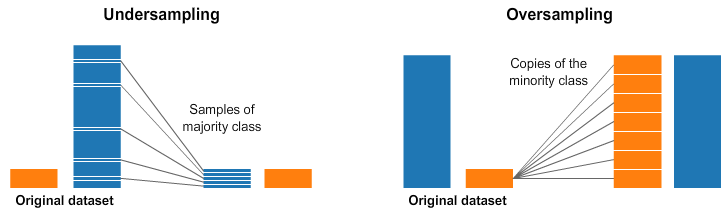




#### NOTE

####   We will be using different pkl files from file #### "Capstone Project _ NLP _ EDA" 

#### With Topic modelling the GRP_0 class has been split into 4 classes (GRP_0 (Access Issue), GRP_0 (Account/Password Reset), GRP_0 (Communication Issue), GRP_0 (Other Issues). Which resulted into indexing and the results should get read accordingly

### Loading Standard and Advance Python Library and modules

In [2]:
#Hide Warnings

import warnings
warnings.filterwarnings('ignore')

# Utilities
from time import time
from PIL import Image
from pprint import pprint
from zipfile import ZipFile
import os, sys, itertools, re, calendar
import warnings, pickle, string, timestring
from IPython.display import IFrame
from ftfy import fix_encoding, fix_text, badness

# Translation APIs
from goslate import Goslate # Provided by Google

# Numerical calculation
import numpy as np

# Data Handling
import pandas as pd
from tqdm import tqdm_notebook

# Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns
#import cufflinks as cf
import plotly as py
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs,init_notebook_mode,plot,iplot
import pyLDAvis
import pyLDAvis.gensim

# Sequential Modeling
import keras
import keras.backend as K
import tensorflow as tf
from keras.datasets import imdb
from keras.models import Sequential, Model
from keras.layers import Bidirectional
from keras.layers.merge import Concatenate
from keras.layers import Input, Dropout, Flatten, Dense, Embedding, LSTM, GRU
from keras.layers import BatchNormalization, TimeDistributed, Conv1D, MaxPooling1D
from keras.constraints import max_norm, unit_norm
from keras.preprocessing.text import Tokenizer, text_to_word_sequence
from keras.preprocessing.sequence import pad_sequences
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.layers.core import Dense, SpatialDropout1D

# Traditional Modeling
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer, TfidfTransformer
from sklearn.svm import SVC, LinearSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

# Topic Modeling
import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.parsing import preprocessing
from gensim.test.utils import common_texts
from gensim.models.doc2vec import Doc2Vec, TaggedDocument
from gensim.models.phrases import Phraser
from gensim.models import Phrases, CoherenceModel

# Tools & Evaluation metrics
from sklearn.metrics import confusion_matrix, classification_report, auc
from sklearn.metrics import roc_curve, accuracy_score, precision_recall_curve
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split, GridSearchCV
from collections import Counter
from imblearn.under_sampling import RandomUnderSampler

#Tensor Flow models

from keras.models import Sequential
import tensorflow as tf
from tensorflow.keras import regularizers, initializers, optimizers, callbacks
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.text import Tokenizer
from keras.utils.np_utils import to_categorical
from tensorflow.keras.layers import *
from tensorflow.keras.models import Model


# NLP toolkits
import spacy
import nltk
from nltk import tokenize
from nltk.corpus import stopwords

In [3]:
# Configure for any default setting of any library
nltk.download('stopwords')
warnings.filterwarnings('ignore')
get_ipython().magic(u'matplotlib inline')
plt.style.use('ggplot')
pyLDAvis.enable_notebook()
init_notebook_mode(connected=True)
%matplotlib inline

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\manav.MAA\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


### <u>Set the working directory</u>
Mount the drive and set the project path to cureent working directory, when running in Google Colab. No changes are required in case of running in Local PC.

In [4]:
# Block which runs on both Google Colab and Local PC without any modification
if 'google.colab' in sys.modules:    
    project_path = "/content/drive/My Drive/Colab Notebooks/DLCP/Capstone-NLP/"
    # Google Colab lib
    from google.colab import drive
    # Mount the drive
    drive.mount('/content/drive/', force_remount=True)
    sys.path.append(project_path)
    %cd $project_path


################

################

################

### LSTM Models without Topic Modeling and upsampling

################

################

################

In [5]:
# Load the preprocessed pickle dataset
with open('model_ready.pkl','rb') as f:
         ticket = pickle.load(f)
ticket.head()

,Short description,sd_len,sd_word_count,Description,desc_len,desc_word_count,Language,Caller,Summary,Assignment group
0,login issue,11,2,verified user detailsemployee manager name che...,177,31,English,spxjnwir pjlcoqds,login issue verified user detailsemployee mana...,GRP_0
1,outlook,7,1,receive from hmjdrvpb.komuaywn@gmail.com hello...,163,23,English,hmjdrvpb komuaywn,outlook receive from hmjdrvpb.komuaywn@gmail.c...,GRP_0
2,can not log in to vpn,21,6,receive from eylqgodm.ybqkwiam@gmail.com hi i ...,72,12,English,eylqgodm ybqkwiam,can not log in to vpn receive from eylqgodm.yb...,GRP_0
3,unable to access hrtool page,28,5,unable to access hrtool page,28,5,English,xbkucsvz gcpydteq,unable to access hrtool page unable to access ...,GRP_0
4,error skype,11,2,error skype,11,2,English,owlgqjme qhcozdfx,error skype error skype,GRP_0


####  LSTM Bidirectional with Glove Embedding 

#### Glove Embedding

GloVe stands for global vectors for word representation. It is an unsupervised learning algorithm developed by Stanford for generating word embeddings by aggregating global word-word co-occurrence matrix from a corpus. 

In [6]:
MAX_NB_WORDS = 100000    # max no. of words for tokenizer
MAX_SEQUENCE_LENGTH = 200 # max length of each entry (sentence), including padding
VALIDATION_SPLIT = 0.2   # data for validation (not used in training)
EMBEDDING_DIM = 100      # embedding dimensions for word vectors (word2vec/GloVe)
GLOVE_DIR = "glove/glove.6B."+str(EMBEDDING_DIM)+"d.txt"

In [7]:
# dropping extra column
ticket_updated=ticket.drop(['Short description','sd_len','sd_word_count','Description','desc_len','desc_word_count','Caller'], axis=1)

In [8]:
ticket_updated.head()

,Language,Summary,Assignment group
0,English,login issue verified user detailsemployee mana...,GRP_0
1,English,outlook receive from hmjdrvpb.komuaywn@gmail.c...,GRP_0
2,English,can not log in to vpn receive from eylqgodm.yb...,GRP_0
3,English,unable to access hrtool page unable to access ...,GRP_0
4,English,error skype error skype,GRP_0


In [9]:
# there are lot of Assignment Group with small frequency.
# Idea is merged together -> 'Other'
# set up the threshold percent
threshold_percent =0.5

series = pd.value_counts(ticket_updated['Assignment group'])
mask = (series / series.sum() * 100).lt(threshold_percent)
ticket_updated=ticket_updated.assign(Assignment_group_updated=np.where(ticket_updated['Assignment group'].isin(series[mask].index),'Other', ticket_updated['Assignment group']))
ticket_updated=ticket_updated.drop(['Assignment group'], axis=1)
ticket_updated.rename(columns = {'Assignment_group_updated':'Assignment group'}, inplace = True) 

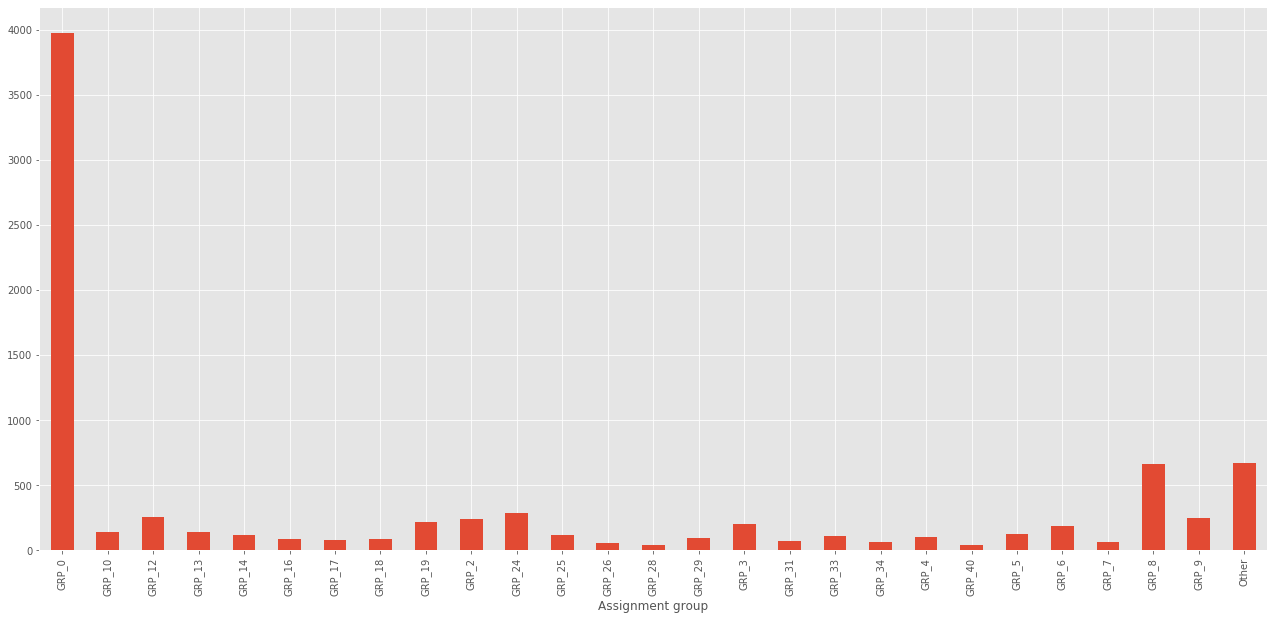

In [10]:
#print the Assignment group
fig = plt.figure(figsize=(22,10))
ticket_updated.groupby('Assignment group').Summary.count().plot.bar(ylim=0)
plt.show();

In [11]:
# Encoding - one-hot
Y = pd.get_dummies(ticket_updated['Assignment group']).values
print('Shape of Assignment group:', Y.shape)

Shape of Assignment group: (8500, 27)


In [12]:
#copy support case desc
support_ticket = ticket_updated['Summary']

In [13]:
# word count
ticket_updated['Summary'].apply(lambda x: len(x.split(' '))).sum()

261099

In [14]:
texts = [] 

for line in tqdm_notebook(support_ticket, total=8500): 
    texts.append(line)

In [15]:
#random printing of data
print('Sample data:', texts[1123],Y[1123] )

Sample data: wifi companysecure not work at sao bernardo do campo iwifi companysecure not work at sao bernardo do campo [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0]


In [16]:
#Creating Token
tokenizer = Tokenizer(num_words=MAX_NB_WORDS)
tokenizer.fit_on_texts(texts)

In [17]:
# creating vocalabory 
sequences = tokenizer.texts_to_sequences(texts)
word_index = tokenizer.word_index
print('Vocabulary size:', len(word_index))

Vocabulary size: 15206


In [18]:
#Padding to make all sequences of the same length
data = pad_sequences(sequences, padding = 'post', maxlen = MAX_SEQUENCE_LENGTH)

print('Shape of data tensor:', data.shape)
print('Shape of label tensor:', Y.shape)

Shape of data tensor: (8500, 200)
Shape of label tensor: (8500, 27)


In [19]:
indices = np.arange(data.shape[0])
np.random.shuffle(indices)
data = data[indices]
labels =Y[indices]

In [20]:
num_validation_samples = int(VALIDATION_SPLIT*data.shape[0])
x_train = data[: -num_validation_samples]
y_train = labels[: -num_validation_samples]
x_val = data[-num_validation_samples: ]
y_val = labels[-num_validation_samples: ]

In [21]:
print('Number of entries in each category:')
print('training: ', y_train.sum(axis=0))
print('validation: ', y_val.sum(axis=0))

Number of entries in each category:
training:  [3178  111  204  110   98   66   64   77  176  181  236   95   41   35
   83  157   59   83   49   77   34  101  140   57  521  208  559]
validation:  [798  29  53  35  20  19  17  11  39  60  53  21  15   9  14  43  10  24
  13  23  11  28  44  11 140  44 116]


In [22]:
#Use of Glove embedding
embeddings_index = {}
f = open(GLOVE_DIR,encoding="utf8")
print('Loading GloVe from:', GLOVE_DIR,'...', end='')
for line in f:
    values = line.split()
    word = values[0]
    embeddings_index[word] = np.asarray(values[1:], dtype='float32')
f.close()
print("Done.\n Proceeding with Embedding Matrix...", end="")

embedding_matrix = np.random.random((len(word_index) + 1, EMBEDDING_DIM))
for word, i in word_index.items():
    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None:
        embedding_matrix[i] = embedding_vector

Loading GloVe from: glove/glove.6B.100d.txt ...Done.
 Proceeding with Embedding Matrix...

In [23]:
vocab_size=len(tokenizer.word_index) +1
vocab_size

15207

In [25]:
### Embedding layer for hint 
model = tf.keras.Sequential()
model.add(Embedding(vocab_size, EMBEDDING_DIM,weights = [embedding_matrix],input_length = MAX_SEQUENCE_LENGTH,
                           trainable=True,name = 'embeddings'))
### Bidirectional LSTM layer 

model.add(Bidirectional(LSTM(128,return_sequences=False)))
#Drop out and dense layer

model.add(Dropout(rate=0.5))

model.add(Dense(27, activation='sigmoid'))

#complie of the model with optimzer 'adam'
model.compile(loss = 'categorical_crossentropy', optimizer='adam',metrics = ['accuracy'])

#summary of model
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embeddings (Embedding)       (None, 200, 100)          1520700   
_________________________________________________________________
bidirectional_1 (Bidirection (None, 256)               234496    
_________________________________________________________________
dropout_1 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 27)                6939      
Total params: 1,762,135
Trainable params: 1,762,135
Non-trainable params: 0
_________________________________________________________________


In [26]:
history=model.fit(x_train, y_train, epochs =10, batch_size=100, validation_data=(x_val, y_val), verbose=1)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Train on 6800 samples, validate on 1700 samples
Epoch 1/10
6800/6800 [==============================] - 89s 13ms/sample - loss: 2.4196 - acc: 0.4569 - val_loss: 1.9316 - val_acc: 0.4694
Epoch 2/10
6800/6800 [==============================] - 95s 14ms/sample - loss: 1.8752 - acc: 0.5003 - val_loss: 1.6892 - val_acc: 0.5471
Epoch 3/10
6800/6800 [==============================] - 96s 14ms/sample - loss: 1.6464 - acc: 0.5607 - val_loss: 1.5429 - val_acc: 0.5865
Epoch 4/10
6800/6800 [==============================] - 99s 15ms/sample - loss: 1.5031 - acc: 0.5940 - val_loss: 1.4144 - val_acc: 0.6118
Epoch 5/10
6800/6800 [==============================] - 98s 14ms/sample - loss: 1.3376 - acc: 0.6232 - val_loss: 1.3406 - val_acc: 0.6165
Epoch 6/10
6800/6800 [==============================] - 100s 15ms/sample - loss: 1.2481 - acc: 0.6354 - val_loss: 1.2987 - val_acc: 0.6218
Epoch 7/10
6800/6800 [=======

In [27]:
loss = history.history['loss']
val_loss = history.history['val_loss']

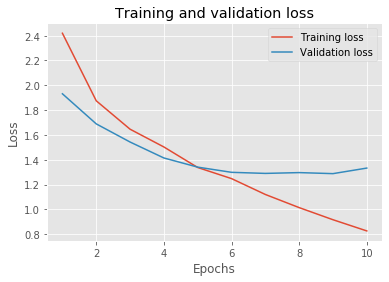

In [28]:
epochs = range(1, len(loss)+1)

plt.plot(epochs, loss, label='Training loss')
plt.plot(epochs, val_loss, label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show();

In [30]:
accuracy = history.history['acc']
val_accuracy = history.history['val_acc']

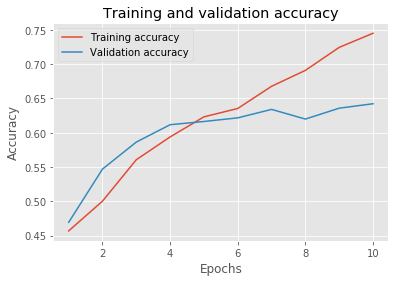

In [31]:
plt.plot(epochs, accuracy, label='Training accuracy')
plt.plot(epochs, val_accuracy, label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend()
plt.show();

In [32]:
rounded_labels=np.argmax(y_val, axis=1)
rounded_labels[1]

14

In [33]:
y_pred = model.predict(x_val, batch_size=64, verbose=1)
y_pred_bool = np.argmax(y_pred, axis=1)

print(classification_report(rounded_labels, y_pred_bool))

1700/1700 [==============================] - 5s 3ms/sample
              precision    recall  f1-score   support

           0       0.78      0.91      0.84       798
           1       0.00      0.00      0.00        29
           2       0.54      0.38      0.44        53
           3       0.25      0.34      0.29        35
           4       0.33      0.05      0.09        20
           5       1.00      0.16      0.27        19
           6       1.00      0.59      0.74        17
           7       0.00      0.00      0.00        11
           8       0.31      0.38      0.34        39
           9       0.62      0.40      0.48        60
          10       0.87      0.91      0.89        53
          11       1.00      0.14      0.25        21
          12       0.00      0.00      0.00        15
          13       0.00      0.00      0.00         9
          14       0.00      0.00      0.00        14
          15       0.41      0.30      0.35        43
          16       0.0

################

################

################

### Models with Topic Modeling and upsampling

################

################

################

### Topic Modeling
Topic Modeling is a technique to extract the hidden topics from large volumes of text. **Latent Dirichlet Allocation(LDA)** is a popular algorithm for topic modeling with excellent implementations in the Python’s Gensim package.

Let's first use gensim to implement LDA and find out any distinctive topics among GRP_0, followed by down-sampling the top 3 topics to contain maximum number of tickets created for.

In [5]:
# Load the preprocessed pickle dataset
with open('model_ready.pkl','rb') as f:
    ticket = pickle.load(f)
ticket.head()

,Short description,sd_len,sd_word_count,Description,desc_len,desc_word_count,Language,Caller,Summary,Assignment group
0,login issue,11,2,verified user detailsemployee manager name che...,177,31,English,spxjnwir pjlcoqds,login issue verified user detailsemployee mana...,GRP_0
1,outlook,7,1,receive from hmjdrvpb.komuaywn@gmail.com hello...,163,23,English,hmjdrvpb komuaywn,outlook receive from hmjdrvpb.komuaywn@gmail.c...,GRP_0
2,can not log in to vpn,21,6,receive from eylqgodm.ybqkwiam@gmail.com hi i ...,72,12,English,eylqgodm ybqkwiam,can not log in to vpn receive from eylqgodm.yb...,GRP_0
3,unable to access hrtool page,28,5,unable to access hrtool page,28,5,English,xbkucsvz gcpydteq,unable to access hrtool page unable to access ...,GRP_0
4,error skype,11,2,error skype,11,2,English,owlgqjme qhcozdfx,error skype error skype,GRP_0


### <u>Create Word Embbeddings</u>
We've observed poor performance in the 1st milestone, which enables us to create our own word embbeddings. Let's load the preprocessed dataset and use Gensim model to create Word2Vec embbeddings.

Word embedding is one of the most important techniques in natural language processing(NLP), where words are mapped to vectors of real numbers. Word embedding is capable of capturing the meaning of a word in a document, semantic and syntactic similarity, relation with other words.

The word2vec algorithms include skip-gram and CBOW models, using either hierarchical softmax or negative sampling.

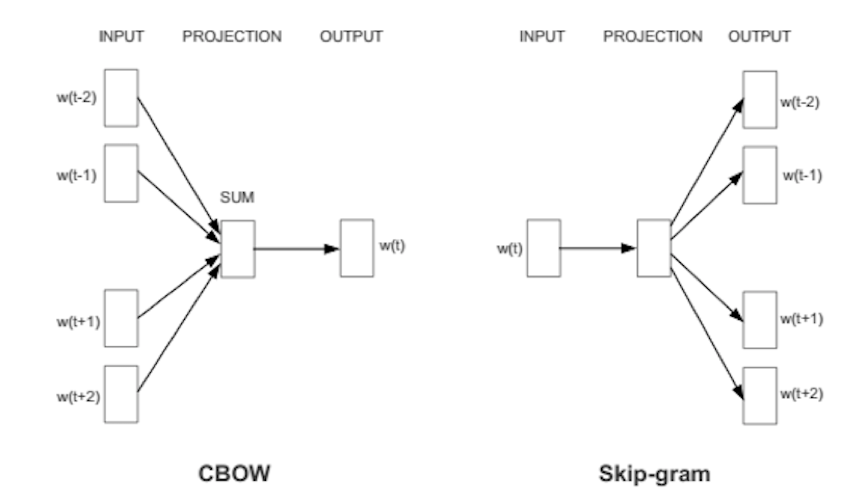

In [6]:
# Initialize spacy 'en' medium model, keeping only tagger component needed for lemmatization
nlp = spacy.load('en_core_web_md', disable=['parser', 'ner'])   
# Function to create the tokenized sentence
def tokenize_sentences(sentence):
    doc = nlp(sentence)
    return [token.lemma_ for token in doc if token.lemma_ !='-PRON-' and not token.is_stop]

sentence_stream=[]
for sent in ticket.Summary.values.tolist():
    sentence_stream.append(tokenize_sentences(sent))

In [7]:
# Create the Bigram and Trigram models
bigram = Phrases(sentence_stream, min_count=2, threshold=2)
trigram = Phrases(bigram[sentence_stream], min_count=2, threshold=1)
bigram_phraser = Phraser(bigram)
trigram_phraser = Phraser(trigram)
ngram_sentences=[]
for sent in sentence_stream:
    tokens_ = bigram_phraser[sent]
    #print("Bigrams Tokens:\t", tokens_)
    tokens_ = trigram_phraser[tokens_]
    ngram_sentences.append(tokens_)
    
#Serialize bigram and trigram for future
bigram_phraser.save('bigram_mdl_14_03_2020.pkl')
trigram_phraser.save('trigram_mdl_14_03_2020.pkl')

In [8]:
# Create the tagged documents
documents = [TaggedDocument(words=doc, tags=[i]) for i, doc in enumerate(ngram_sentences)]
print("Length of Tagged Documents:",len(documents))
print("Tagged Documents[345]:",documents[345])

Length of Tagged Documents: 8500
Tagged Documents[345]: TaggedDocument(['urgent', 'access', 'rtnzvplq', 'erhmuncq', 'disconnect', 'receive_osjqfbvw.hlmgrfpx@gmail.com', 'hi_help', 'error_message', 'server_disconnect', 'edit', 'trgdyyufs', 'calendar', 'invitation', 'calendar', 'calendar_entry', 'possible', 'urgent'], [345])


In [9]:
# Build the Word2Vec model
max_epochs = 100
vec_size = 300
alpha = 0.025
model = Doc2Vec(vector_size=vec_size,window=2,
                alpha=alpha, 
                min_alpha=0.00025,
                min_count=2,
                dm =1)
model.build_vocab(documents)

for epoch in range(max_epochs):
    model.train(documents, 
                total_examples=model.corpus_count,
                epochs=model.iter)
    # decrease the learning rate
    model.alpha -= 0.0002
    # fix the learning rate, no decay
    model.min_alpha = model.alpha

model.save("d2v_inc_model.mdl")
print("Model Saved")

Model Saved


**Comments**:
Word Embbeddings are generated from the corpus of our tickets dataset and serialized for further use.


We've observed poor performance in the 1st milestone, which enables us to introduce 2 more attributes, such as:

- **Shift**: Working shift of the support associate in which the ticket was recieved OR failure occured
- **Lines**: Lines of text present in the ticket description column
Load the searialized dataset stored after 1st milestone's EDA and append the above attributes to them. Also drop sd_len, sd_word_count, desc_len, desc_word_count columns

In [10]:
# Function to determine the Part of the Day (POD)
def get_POD(tkt):
    dt1 = r"(?:\d{1,2}[\/-]){2}\d{4} (?:\d{2}:?){3}"
    dt2 = r"\d{4}(?:[\/-]\d{1,2}){2} (?:\d{2}:?){3}"
    months = '|'.join(calendar.month_name[1:])
    dt3 = fr'[a-zA-Z]+day, (?i:{months}) \d{{1,2}}, \d{{4}} \d{{1,2}}:\d{{1,2}} (?i:am|pm)'
    matches = set(re.findall('|'.join([dt1,dt2,dt3]), tkt))
    if len(matches):
        try:
            hr = timestring.Date(list(matches)[0]).hour
            return 'Morning' if (hr >= 6) and (hr < 18) else 'Night'
        except:
            pass
    return 'General'

In [11]:
# Get POD and lines of Desc from the unprocessed pickle
with open('translated_ticket.pkl','rb') as f:
    ticket_1 = pickle.load(f)

lines = ticket_1.Description.apply(lambda x: len(str(x).split('\n')))
shifts = ticket_1[['Short description', 'Description']].agg(lambda x: get_POD(str(x[0]) + str(x[1])), axis=1)
shifts.value_counts()

General    7508
Night       571
Morning     421
dtype: int64

In [12]:
# Drop the unwanted columns

ticket.drop(['sd_len','sd_word_count','desc_len','desc_word_count'], axis=1, inplace=True)
# Insert the new attributes
ticket.insert(loc=ticket.shape[1]-1, column='Shift', value=shifts)
ticket.insert(loc=ticket.shape[1]-1, column='Lines', value=lines)

# Check the head of the dataset
ticket.head()

,Short description,Description,Language,Caller,Summary,Shift,Lines,Assignment group
0,login issue,verified user detailsemployee manager name che...,English,spxjnwir pjlcoqds,login issue verified user detailsemployee mana...,General,5,GRP_0
1,outlook,receive from hmjdrvpb.komuaywn@gmail.com hello...,English,hmjdrvpb komuaywn,outlook receive from hmjdrvpb.komuaywn@gmail.c...,General,7,GRP_0
2,can not log in to vpn,receive from eylqgodm.ybqkwiam@gmail.com hi i ...,English,eylqgodm ybqkwiam,can not log in to vpn receive from eylqgodm.yb...,General,7,GRP_0
3,unable to access hrtool page,unable to access hrtool page,English,xbkucsvz gcpydteq,unable to access hrtool page unable to access ...,General,1,GRP_0
4,error skype,error skype,English,owlgqjme qhcozdfx,error skype error skype,General,1,GRP_0


In [13]:
# Records assigned to only GRP_0
#grp0_tickets = ticket[ticket['Assignment group'] == 'GRP_0']

# Prepare NLTK STOPWORDS
STOP_WORDS = stopwords.words('english')
STOP_WORDS.extend(['yes','na','hi','receive','hello','regards','thanks','see','help',
                  'from','greeting','will','please','able','list','set','mm',
                    'due','go','cool','now','add','say','pl','take','uacyltoe','hxgaycze','come','et','mm','datum',
                  'png','set', 'due', 'da',])

#### 2. Tokenize words and Clean-up text
Tokenize each sentence into a list of words, removing punctuations and unnecessary characters altogether.

In [14]:
# Vectorizations
def sent_to_words(sentences):
    for sentence in sentences:
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))  # deacc=True removes punctuations

In [15]:
data_words = list(sent_to_words(ticket['Summary'].values.tolist()))
data_words_nostops = [[word for word in simple_preprocess(str(doc)) if word not in STOP_WORDS] for doc in data_words]

In [16]:
grp0_tickets = ticket[ticket['Assignment group'] == 'GRP_0']

#### 3. Bigram and Trigram Models
Bigrams and Trigrams are two and three words frequently occurring together respectively in a document.

In [17]:
# Build the bigram and trigram models
bigram = gensim.models.Phrases(data_words, min_count=5, threshold=100) # higher threshold fewer phrases.
trigram = gensim.models.Phrases(bigram[data_words], threshold=100)  

# Faster way to get a sentence clubbed as a trigram/bigram
bigram_mod = gensim.models.phrases.Phraser(bigram)
data_words_bigrams = [bigram_mod[doc] for doc in data_words_nostops]

trigram_mod = gensim.models.phrases.Phraser(trigram)
data_words_trigrams = [trigram_mod[doc] for doc in data_words_nostops]

#### 4. Dictionary and Corpus needed for Topic Modeling
Creare the two main inputs to the LDA topic model are the dictionary(id2word) and the corpus.

In [18]:
# Create Dictionary
id2word = corpora.Dictionary(data_words_bigrams)

# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in data_words_bigrams]

#### 5. Building the Topic Model
Build a Topic Model with top 3 different topics where each topic is a combination of keywords and each keyword contributes a certain weightage to the topic.

In [19]:
# Build LDA model
lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                           id2word=id2word,
                                           num_topics=3, 
                                           random_state=100,
                                           update_every=1,
                                           chunksize=100,
                                           passes=10,
                                           alpha='auto',
                                           per_word_topics=True)

for idx, topic in lda_model.print_topics():
    print('Topic: {} \nWords: {}'.format(idx+1, topic))
    print()

Topic: 1 
Words: 0.068*"job" + 0.043*"jobscheduler" + 0.033*"abended" + 0.026*"company" + 0.025*"com" + 0.022*"event" + 0.022*"monitoring_tool" + 0.015*"fail" + 0.014*"device" + 0.013*"accessgroup_aclinside"

Topic: 2 
Words: 0.028*"yesnona" + 0.018*"work" + 0.018*"outlook" + 0.016*"site" + 0.016*"update" + 0.015*"server" + 0.014*"hostname" + 0.013*"unable" + 0.013*"connect" + 0.012*"network"

Topic: 3 
Words: 0.024*"password" + 0.022*"gmail" + 0.021*"com" + 0.018*"erp" + 0.016*"user" + 0.015*"reset" + 0.015*"account" + 0.013*"issue" + 0.013*"access" + 0.012*"error"



**How to interpret this?**

Topic 1 is a represented as `0.060*"company" + 0.028*"windows" + 0.026*"device" + 0.021*"vpn" + 0.021*"connect" + 0.018*"message" + 0.014*"link" + 0.013*"window" + 0.011*"follow" + 0.011*"use"`

It means the top 10 keywords that contribute to this topic are: ‘company’, ‘windows’, ‘device’.. and so on and the weight of ‘windows’ on topic 1 is 0.028.

The weights reflect how important a keyword is to that topic.

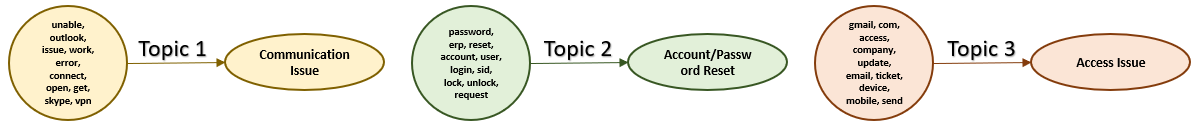

#### 6. Model Perplexity and Coherence Score
Model perplexity and topic coherence provide a convenient measure to judge how good a given topic model is.

In [20]:
# Compute Perplexity
print('\nPerplexity: ', lda_model.log_perplexity(corpus))  # a measure of how good the model is. lower the better.

# Compute Coherence Score
coherence_model_lda = CoherenceModel(model=lda_model, texts=data_words_bigrams, dictionary=id2word, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)


Perplexity:  -7.349429878965011

Coherence Score:  0.3599961643643012


#### 7. Visualize the topics-keywords
Examine the produced topics and the associated keywords using pyLDAvis.

In [20]:
# Visualize the topics
pyLDAvis.save_html(pyLDAvis.gensim.prepare(lda_model, corpus, id2word), 'lda.html')
IFrame(src='./lda.html', width=1220, height=858)

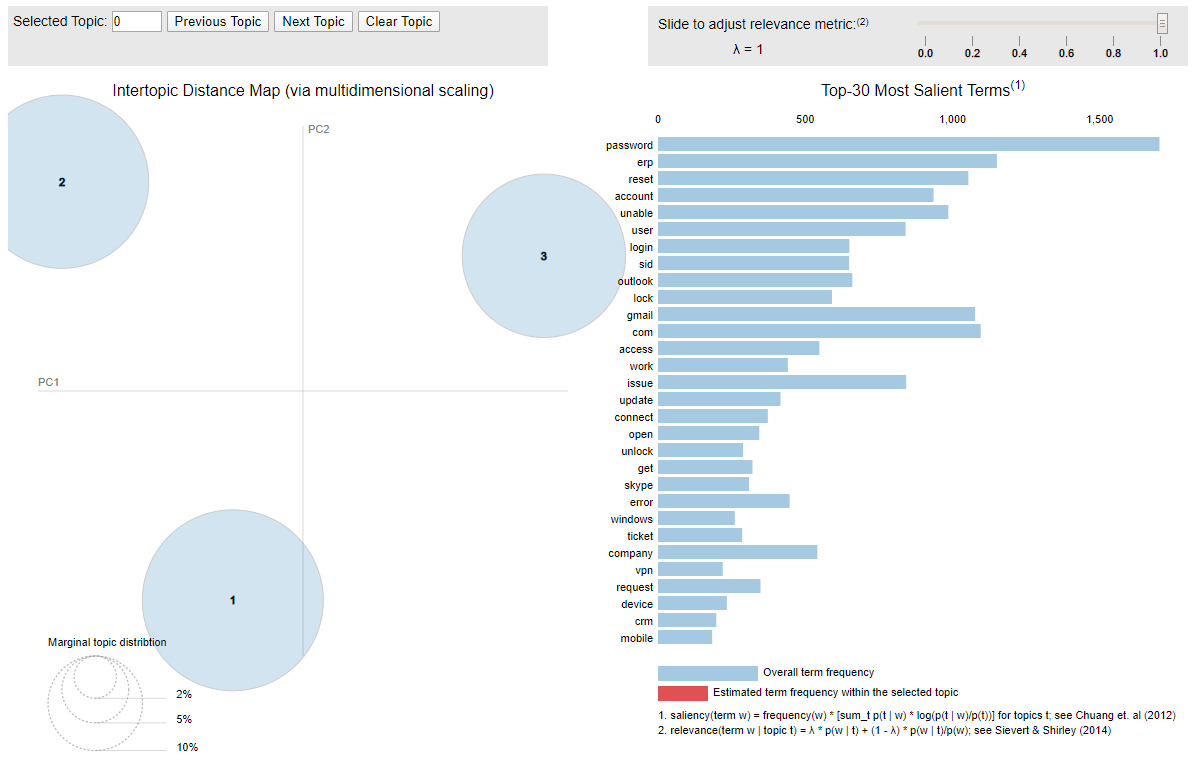
#### 8. Topic assignment for GRP_0 tickets
Run LDA for each record of GRP_0 to find the associated topic based on the LDA score. As the topic modeling has been trained to accomodate only top 3 topics for entire GRP_0 data, any record scoring less than 50%, we categorize them into 4th(other) topic and such tickets are not the candidates for resampling.

In [21]:
# Function to Determine topic
TOPICS = {1:"Communication Issue", 2:"Account/Password Reset", 3:"Access Issue", 4:"Other Issues"}
def get_groups(text):
    bow_vector = id2word.doc2bow([word for word in simple_preprocess(text) if word not in STOP_WORDS])
    index, score = sorted(lda_model[bow_vector][0], key=lambda tup: tup[1], reverse=True)[0]
    return TOPICS[index+1 if score > 0.5 else 4], round(score, 2)

# Check for a Random record
text = grp0_tickets.reset_index().loc[np.random.randint(0, grp0_tickets.shape[1]),'Summary']
topic, score = get_groups(text)
print("\033[1mText:\033[0m {}\n\033[1mTopic:\033[0m {}\n\033[1mScore:\033[0m {}".format(text, topic, score))

Text: unable to log in to engineering tool and skype unable to log in to engineering tool and skype
Topic: Access Issue
Score: 0.9800000190734863


In [22]:
# Apply the function to the dataset
grp0_tickets.insert(loc=grp0_tickets.shape[1]-1, 
                   column='Topic', 
                   value=[get_groups(text)[0] for text in grp0_tickets.Summary])
grp0_tickets.head()

,Short description,Description,Language,Caller,Summary,Shift,Lines,Topic,Assignment group
0,login issue,verified user detailsemployee manager name che...,English,spxjnwir pjlcoqds,login issue verified user detailsemployee mana...,General,5,Access Issue,GRP_0
1,outlook,receive from hmjdrvpb.komuaywn@gmail.com hello...,English,hmjdrvpb komuaywn,outlook receive from hmjdrvpb.komuaywn@gmail.c...,General,7,Access Issue,GRP_0
2,can not log in to vpn,receive from eylqgodm.ybqkwiam@gmail.com hi i ...,English,eylqgodm ybqkwiam,can not log in to vpn receive from eylqgodm.yb...,General,7,Access Issue,GRP_0
3,unable to access hrtool page,unable to access hrtool page,English,xbkucsvz gcpydteq,unable to access hrtool page unable to access ...,General,1,Account/Password Reset,GRP_0
4,error skype,error skype,English,owlgqjme qhcozdfx,error skype error skype,General,1,Access Issue,GRP_0


In [23]:
# Count the records based on Topics
grp0_tickets.Topic.value_counts()

Access Issue              2938
Account/Password Reset     858
Communication Issue         98
Other Issues                82
Name: Topic, dtype: int64

**Observations**:
- From the above analysis, it's evident that the tope 3 topics are present in maximum numbers.
- Except for the Other Issues, rest 3 categories of records can be down sampled to balance the dataset

#### 9. Down-sampling the majority topics under GRP_0
Under-sample the majority class(es) by randomly picking samples with or without replacement. We're using RandomUnderSampler class from imblearn.

In [24]:
# Instantiate the UnderSampler class
sampler = RandomUnderSampler(sampling_strategy='auto')
# Fit the data
X_res, y_res = sampler.fit_resample(grp0_tickets.drop(['Assignment group','Topic'], axis=1), grp0_tickets.Topic)


In [25]:
# Check the ratio of output topics
X_res = pd.DataFrame(X_res, columns=["Short description", "Description", "Language","Caller","Summary","Shift","Lines"])
y_res = pd.DataFrame(y_res, columns = ["Topic"])

**Observation:**<br/>
The output of the UnderSampling technique shows that all the 4 distinct topics are resampled to exactly match the records in each topic making them a perfectly balanced distribution under GRP_0.

Let's combine the Topic and Assignment group columns to maintain a single target attribute.

In [26]:
# Combine Topic and Assignment Group columns
grp0_tickets = pd.concat([X_res, y_res], axis=1, sort=False)
grp0_tickets['Assignment group'] = grp0_tickets['Topic'].apply(lambda x: f'GRP_0 ({x})')
# Drop the Topic column
grp0_tickets.drop(['Topic'], axis=1, inplace=True)
print(f"\033[1mNew size of GRP_0 tickets:\033[0m {grp0_tickets.shape}")
grp0_tickets.head()

New size of GRP_0 tickets: (328, 8)


,Short description,Description,Language,Caller,Summary,Shift,Lines,Assignment group
0,vip account unlock,vip account unlock,English,tqjsmwvk arqoytbh,vip account unlock vip account unlock,General,1,GRP_0 (Access Issue)
1,office ask for license key,office ask for license key,English,cjsukemx lqkcesuf,office ask for license key office ask for lice...,General,1,GRP_0 (Access Issue)
2,globaltelecom broadband,receive from vnetbgio.lqxztben@gmail.com hi no...,English,vnetbgio lqxztben,globaltelecom broadband receive from vnetbgio....,General,11,GRP_0 (Access Issue)
3,windows account lockout,windows account lockout,English,dmtcvxow xkjriven,windows account lockout windows account lockout,General,1,GRP_0 (Access Issue)
4,vpn connection issue,vpn connection issue connect to the user syste...,English,qwreamdz pmarxvtk,vpn connection issue vpn connection issue conn...,General,5,GRP_0 (Access Issue)


#### 10. Club groups with lesser tickets assigned
Combine all groups with less than 25 tickets assigned into one separate group named ***Miscellaneous***

#Groups with less than equal to 15 tickets assigned: 37


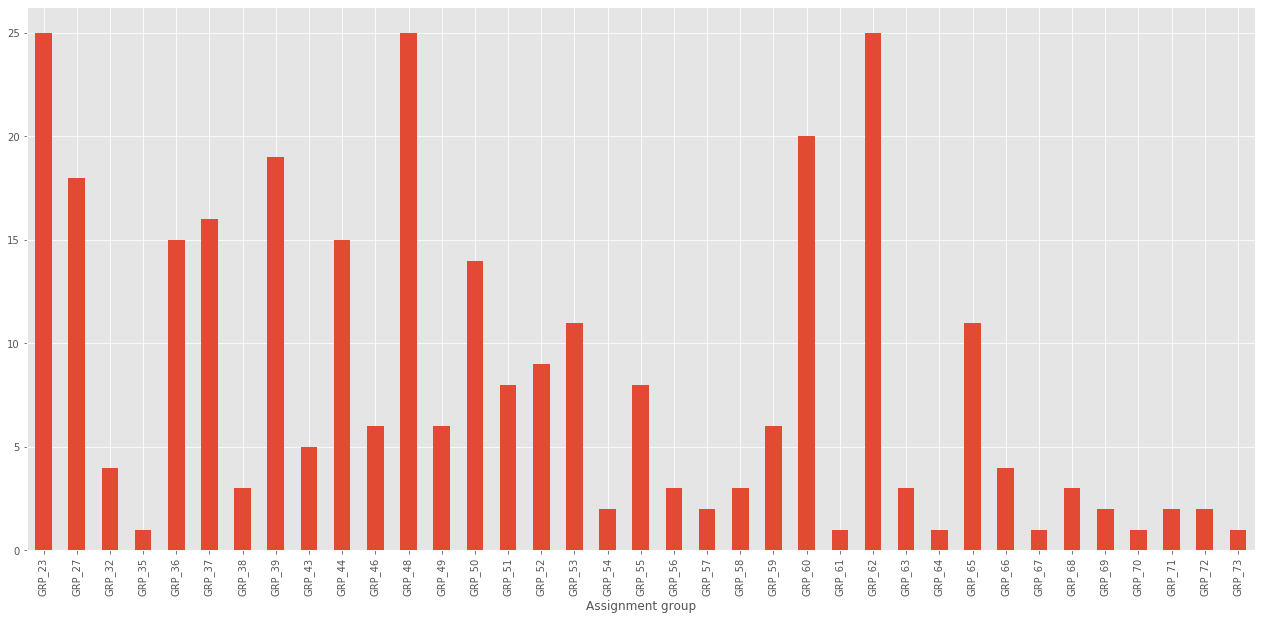

In [27]:
# Find out the Assignment Groups with less than equal to 25 tickets assigned
rare_tickets = ticket.groupby(['Assignment group']).filter(lambda x: len(x) <= 25)
print('\033[1m#Groups with less than equal to 15 tickets assigned:\033[0m', rare_tickets['Assignment group'].nunique())

#print the Assignment group
fig = plt.figure(figsize=(22,10))
rare_tickets.groupby('Assignment group').Summary.count().plot.bar(ylim=0)
plt.show();
# Rename the Assignment group attribute
rare_tickets['Assignment group'] = 'Miscellaneous'

#### 11. Join and prepare the balanced dataset. Oversampling by adding additional records
Let's club together resampled topics under GRP_0 with Miscellaneous group with less than 25 tickets with all others

In [58]:
# Find tickets with good number of tickets assigned
good_tickets = ticket.iloc[[idx for idx in ticket.index if idx not in rare_tickets.index]]
good_tickets = good_tickets[good_tickets['Assignment group'] != 'GRP_0']

# Join all the 3 datasets
ticket = pd.concat([grp0_tickets, good_tickets, rare_tickets]).reset_index(drop=True)


In [59]:
# Serialize the balanced dataset
with open('balanced_ticket.pkl','wb') as f:
    pickle.dump(ticket[['Summary','Assignment group']], f, pickle.HIGHEST_PROTOCOL)

ticket.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10215 entries, 0 to 10214
Data columns (total 8 columns):
Short description    10215 non-null object
Description          10215 non-null object
Language             10215 non-null object
Caller               10215 non-null object
Summary              10215 non-null object
Shift                10215 non-null object
Lines                10215 non-null object
Assignment group     10215 non-null object
dtypes: object(8)
memory usage: 638.5+ KB


In [60]:
# Visualize the assignment groups distribution
print('\033[1m#Unique groups remaining:\033[0m', ticket['Assignment group'].nunique())
pd.DataFrame(ticket.groupby('Assignment group').size(),columns = ['Count']).reset_index()

#Unique groups remaining: 41


,Assignment group,Count
0,GRP_0 (Access Issue),1086
1,GRP_0 (Account/Password Reset),1009
2,GRP_0 (Communication Issue),1057
3,GRP_0 (Other Issues),971
4,GRP_1,17
5,GRP_10,90
6,GRP_11,14
7,GRP_12,164
8,GRP_13,95
9,GRP_14,69


#### With Topic modeling the GRP_0 class has been split into 4 classes (GRP_0 (Access Issue), GRP_0 (Account/Password Reset), GRP_0 (Communication Issue), GRP_0 (Other Issues). Which resulted into indexing and the results should get read accordingly

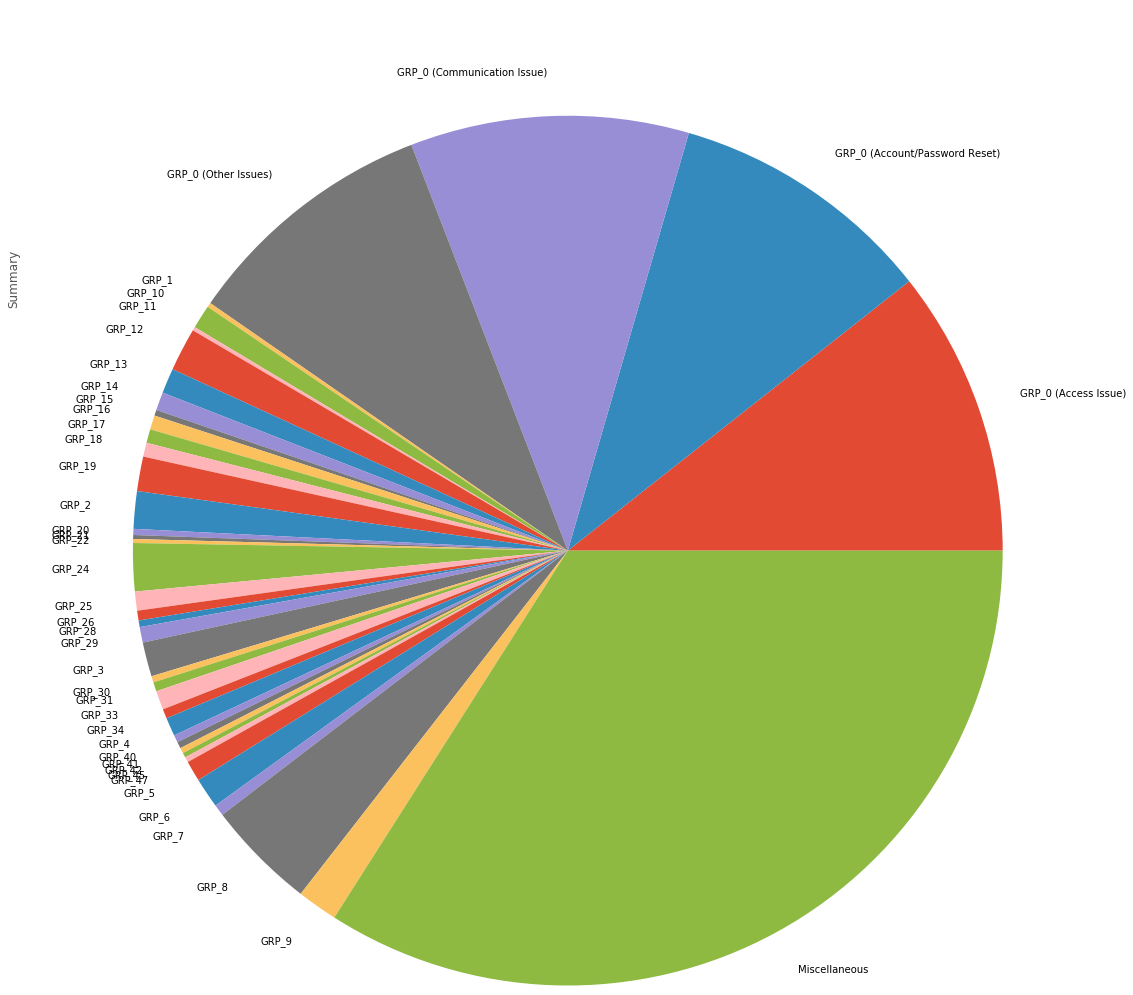

In [61]:
#print the Assignment group
fig = plt.figure(figsize=(22,10))
ticket.groupby('Assignment group').Summary.count().plot.pie(ylim=0)
plt.show();

**Comments:**
- It's evident from the pie chart above the dataset is nearly balanced which can be considered for model building.

## <u>Model Building</u>
Let's proceed towards trying different model architectures mentioned below to classify the problem and validate which one is outperforming.
- Multinomial Naive Bayes
- K Nearest neighbor
- Support Vector Machine
- Decission Tree
- Random Forest
- Deep Neural Network
- Convolutional Neural Network
- Recurrent Neural Network
- Recurrent Convolutional Neural Network
- RNN with LSTM

Let's create another column of categorical datatype from Assignment groups. Let's write some generic methods for utilities and to plot evaluation metrics.

In [33]:
# Load the preprocessed pickle dataset
with open('balanced_ticket.pkl','rb') as f:
    ticket = pickle.load(f)
ticket.head()

,Summary,Assignment group
0,vip account unlock vip account unlock,GRP_0 (Access Issue)
1,office ask for license key office ask for lice...,GRP_0 (Access Issue)
2,globaltelecom broadband receive from vnetbgio....,GRP_0 (Access Issue)
3,windows account lockout windows account lockout,GRP_0 (Access Issue)
4,vpn connection issue vpn connection issue conn...,GRP_0 (Access Issue)


In [34]:
# Create a target categorical column
ticket['target'] = ticket['Assignment group'].astype('category').cat.codes
ticket.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10215 entries, 0 to 10214
Data columns (total 3 columns):
Summary             10215 non-null object
Assignment group    10215 non-null object
target              10215 non-null int8
dtypes: int8(1), object(2)
memory usage: 169.7+ KB


In [35]:
ticket.head()

,Summary,Assignment group,target
0,vip account unlock vip account unlock,GRP_0 (Access Issue),0
1,office ask for license key office ask for lice...,GRP_0 (Access Issue),0
2,globaltelecom broadband receive from vnetbgio....,GRP_0 (Access Issue),0
3,windows account lockout windows account lockout,GRP_0 (Access Issue),0
4,vpn connection issue vpn connection issue conn...,GRP_0 (Access Issue),0


In [36]:
# A class that logs the time
class Timer():
    '''
    A generic class to log the time
    '''
    def __init__(self):
        self.start_ts = None
    def start(self):
        self.start_ts = time()
    def stop(self):
        return 'Time taken: %2fs' % (time()-self.start_ts)
    
timer = Timer()

# A method that plots the Precision-Recall curve
def plot_prec_recall_vs_thresh(precisions, recalls, thresholds):
    plt.figure(figsize=(10,5))
    plt.plot(thresholds, precisions[:-1], 'b--', label='precision')
    plt.plot(thresholds, recalls[:-1], 'g--', label = 'recall')
    plt.xlabel('Threshold')
    plt.legend()

# A method to train and test the model
def run_classification(estimator, X_train, X_test, y_train, y_test, arch_name=None, pipelineRequired=True, isDeepModel=False):
    timer.start()
    # train the model
    clf = estimator

    if pipelineRequired :
        clf = Pipeline([('vect', CountVectorizer()),
                     ('tfidf', TfidfTransformer()),
                     ('clf', estimator),
                     ])
      
    if isDeepModel :
        clf.fit(X_train, y_train, validation_data=(X_test, y_test),epochs=10, batch_size=128,verbose=1,callbacks=call_backs(arch_name))
        # predict from the claffier
        y_pred = clf.predict(X_test)
        y_pred = np.argmax(y_pred, axis=1)
        y_train_pred = clf.predict(X_train)
        y_train_pred = np.argmax(y_train_pred, axis=1)
    else :
        clf.fit(X_train, y_train)
        # predict from the claffier
        y_pred = clf.predict(X_test)
        y_train_pred = clf.predict(X_train)
    
    print('Estimator:', clf)
    print('='*80)
    print('Training accuracy: %.2f%%' % (accuracy_score(y_train,y_train_pred) * 100))
    print('Testing accuracy: %.2f%%' % (accuracy_score(y_test, y_pred) * 100))
    print('='*80)
    print('Confusion matrix:\n %s' % (confusion_matrix(y_test, y_pred)))
    print('='*80)
    print('Classification report:\n %s' % (classification_report(y_test, y_pred)))
    print(timer.stop(), 'to run the model')

In [37]:
# Create training and test datasets with 80:20 ratio
X_train, X_test, y_train, y_test = train_test_split(ticket.Summary, 
                                                    ticket.target, 
                                                    test_size=0.20, 
                                                    random_state=42)
print('\033[1mShape of the training set:\033[0m', X_train.shape, X_test.shape)
print('\033[1mShape of the test set:\033[0m', y_train.shape, y_test.shape)

Shape of the training set: (8172,) (2043,)
Shape of the test set: (8172,) (2043,)


### <u>Naive Bayes Classifier</u>
Naive Bayes is a simple technique for constructing classifiers: models that assign class labels to problem instances, represented as vectors of feature values, where the class labels are drawn from some finite set. There is not a single algorithm for training such classifiers, but a family of algorithms based on a common principle: all naive Bayes classifiers assume that the value of a particular feature is independent of the value of any other feature, given the class variable. 

Advantages:
*   It works very well with text data
*   Easy to implement
*   Fast in comparing to other algorithms

Disadvantages:
*   A strong assumption about the shape of the data distribution
*   Limited by data scarcity for which any possible value in feature space, a likelihood value must be estimated by a frequentist


In [67]:
run_classification(MultinomialNB(), X_train, X_test, y_train, y_test)

Estimator: Pipeline(memory=None,
         steps=[('vect',
                 CountVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.int64'>, encoding='utf-8',
                                 input='content', lowercase=True, max_df=1.0,
                                 max_features=None, min_df=1,
                                 ngram_range=(1, 1), preprocessor=None,
                                 stop_words=None, strip_accents=None,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, vocabulary=None)),
                ('tfidf',
                 TfidfTransformer(norm='l2', smooth_idf=True,
                                  sublinear_tf=False, use_idf=True)),
                ('clf',
                 MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))],
         verbose=False)
Training accuracy: 69.75%
Testing accur

### <u>K-nearest Neighbor</u>
In pattern recognition, the k-nearest neighbors algorithm (k-NN) is a non-parametric method used for classification and regression. In both cases, the input consists of the k closest training examples in the feature space. The output depends on whether k-NN is used for classification or regression:

In k-NN classification, the output is a class membership. An object is classified by a plurality vote of its neighbors, with the object being assigned to the class most common among its k nearest neighbors (k is a positive integer, typically small). If k = 1, then the object is simply assigned to the class of that single nearest neighbor.
In k-NN regression, the output is the property value for the object. This value is the average of the values of k nearest neighbors.
k-NN is a type of instance-based learning, or lazy learning, where the function is only approximated locally and all computation is deferred until classification.

Both for classification and regression, a useful technique can be to assign weights to the contributions of the neighbors, so that the nearer neighbors contribute more to the average than the more distant ones. For example, a common weighting scheme consists in giving each neighbor a weight of 1/d, where d is the distance to the neighbor.

The neighbors are taken from a set of objects for which the class (for k-NN classification) or the object property value (for k-NN regression) is known. This can be thought of as the training set for the algorithm, though no explicit training step is required.

A peculiarity of the k-NN algorithm is that it is sensitive to the local structure of the data.

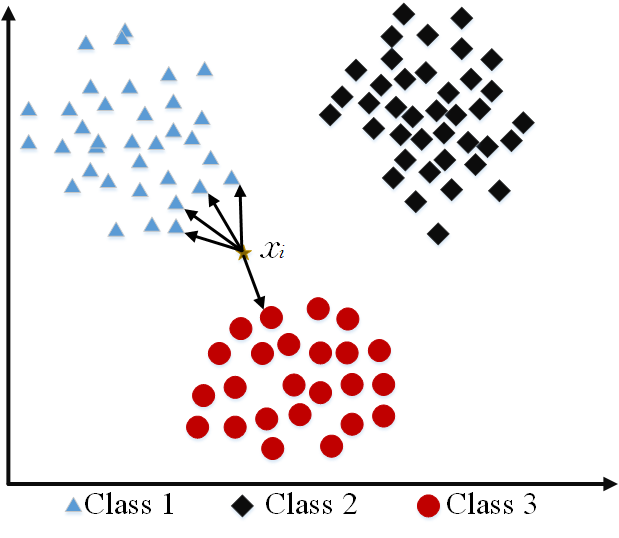

In [38]:
run_classification(KNeighborsClassifier(), X_train, X_test, y_train, y_test)

Estimator: Pipeline(memory=None,
         steps=[('vect',
                 CountVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.int64'>, encoding='utf-8',
                                 input='content', lowercase=True, max_df=1.0,
                                 max_features=None, min_df=1,
                                 ngram_range=(1, 1), preprocessor=None,
                                 stop_words=None, strip_accents=None,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, vocabulary=None)),
                ('tfidf',
                 TfidfTransformer(norm='l2', smooth_idf=True,
                                  sublinear_tf=False, use_idf=True)),
                ('clf',
                 KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                      metric='minkowski', metric_params=

In [39]:
#Iteration 2: algorithm : kd_tree

run_classification(KNeighborsClassifier(algorithm='kd_tree'), X_train, X_test, y_train, y_test)

Estimator: Pipeline(memory=None,
         steps=[('vect',
                 CountVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.int64'>, encoding='utf-8',
                                 input='content', lowercase=True, max_df=1.0,
                                 max_features=None, min_df=1,
                                 ngram_range=(1, 1), preprocessor=None,
                                 stop_words=None, strip_accents=None,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, vocabulary=None)),
                ('tfidf',
                 TfidfTransformer(norm='l2', smooth_idf=True,
                                  sublinear_tf=False, use_idf=True)),
                ('clf',
                 KNeighborsClassifier(algorithm='kd_tree', leaf_size=30,
                                      metric='minkowski', metric_para

In [40]:
#Iteration 3: p=1 is equivalent to using manhattan_distance
run_classification(KNeighborsClassifier(p=1), X_train, X_test, y_train, y_test)

Estimator: Pipeline(memory=None,
         steps=[('vect',
                 CountVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.int64'>, encoding='utf-8',
                                 input='content', lowercase=True, max_df=1.0,
                                 max_features=None, min_df=1,
                                 ngram_range=(1, 1), preprocessor=None,
                                 stop_words=None, strip_accents=None,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, vocabulary=None)),
                ('tfidf',
                 TfidfTransformer(norm='l2', smooth_idf=True,
                                  sublinear_tf=False, use_idf=True)),
                ('clf',
                 KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                      metric='minkowski', metric_params=

In [41]:
# Iteration 4: Weights = 'distance' weight points by the inverse of their distance. in this case, closer neighbors of a query point will have a greater influence than neighbors which are further away.
run_classification(KNeighborsClassifier(weights='distance'), X_train, X_test, y_train, y_test)

Estimator: Pipeline(memory=None,
         steps=[('vect',
                 CountVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.int64'>, encoding='utf-8',
                                 input='content', lowercase=True, max_df=1.0,
                                 max_features=None, min_df=1,
                                 ngram_range=(1, 1), preprocessor=None,
                                 stop_words=None, strip_accents=None,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, vocabulary=None)),
                ('tfidf',
                 TfidfTransformer(norm='l2', smooth_idf=True,
                                  sublinear_tf=False, use_idf=True)),
                ('clf',
                 KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                      metric='minkowski', metric_params=

### <u>Support Vector Machine (SVM)</u>
In machine learning, support-vector machines (SVMs, also support-vector networks) are supervised learning models with associated learning algorithms that analyze data used for classification and regression analysis. Given a set of training examples, each marked as belonging to one or the other of two categories, an SVM training algorithm builds a model that assigns new examples to one category or the other, making it a non-probabilistic binary linear classifier (although methods such as Platt scaling exist to use SVM in a probabilistic classification setting). An SVM model is a representation of the examples as points in space, mapped so that the examples of the separate categories are divided by a clear gap that is as wide as possible. New examples are then mapped into that same space and predicted to belong to a category based on the side of the gap on which they fall.

In addition to performing linear classification, SVMs can efficiently perform a non-linear classification using what is called the kernel trick, implicitly mapping their inputs into high-dimensional feature spaces.

When data are unlabelled, supervised learning is not possible, and an unsupervised learning approach is required, which attempts to find natural clustering of the data to groups, and then map new data to these formed groups. The support-vector clustering algorithm, created by Hava Siegelmann and Vladimir Vapnik, applies the statistics of support vectors, developed in the support vector machines algorithm, to categorize unlabeled data, and is one of the most widely used clustering algorithms in industrial applications.

The advantages of support vector machines are based on scikit-learn page:

*   Effective in high dimensional spaces.
*   Still effective in cases where number of dimensions is greater than the number of samples
*   Uses a subset of training points in the decision function (called support vectors), so it is also memory efficient.
*   Versatile: different Kernel functions can be specified for the decision function. Common kernels are provided, but it is also possible to specify custom kernels.

The disadvantages of support vector machines include:


*   If the number of features is much greater than the number of samples, avoiding over-fitting via choosing kernel functions and regularization term is crucial.
*   SVMs do not directly provide probability estimates, these are calculated using an expensive five-fold cross-validation (see Scores and probabilities, below).

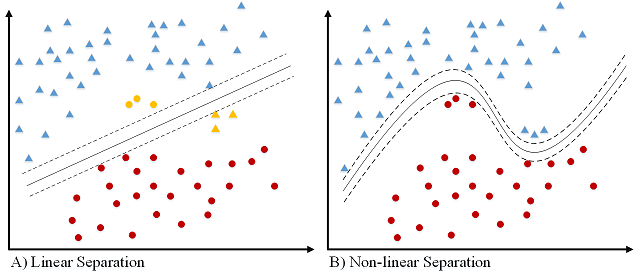

In [69]:
# SVM with Linear kernel
run_classification(LinearSVC(), X_train, X_test, y_train, y_test)

Estimator: Pipeline(memory=None,
         steps=[('vect',
                 CountVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.int64'>, encoding='utf-8',
                                 input='content', lowercase=True, max_df=1.0,
                                 max_features=None, min_df=1,
                                 ngram_range=(1, 1), preprocessor=None,
                                 stop_words=None, strip_accents=None,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, vocabulary=None)),
                ('tfidf',
                 TfidfTransformer(norm='l2', smooth_idf=True,
                                  sublinear_tf=False, use_idf=True)),
                ('clf',
                 LinearSVC(C=1.0, class_weight=None, dual=True,
                           fit_intercept=True, intercept_scaling=1,
          

### <u>Decision Tree</u>
Decision tree classifiers are utilized as a well known classification technique in different pattern recognition issues, for example, image classification and character recognition (Safavian & Landgrebe, 1991). Decision tree classifiers perform more successfully, specifically for complex classification problems, due to their high adaptability and computationally effective features. Besides, decision tree classifiers exceed expectations over numerous typical supervised classification methods (Friedl & Brodley, 1997).

In particular, no distribution assumption is needed by decision tree classifiers regarding the input data. This particular feature gives to the Decision Tree Classifiers a higher adaptability to deal with different datasets, whether numeric or categorical, even with missing data. Also, decision tree classifiers are basically nonparametric. Also, decision trees are ideal for dealing with nonlinear relations among features and classes. At long last, the classification procedure through a tree-like structure is constantly natural and interpretable.

In [71]:
run_classification(DecisionTreeClassifier(), X_train, X_test, y_train, y_test)

Estimator: Pipeline(memory=None,
         steps=[('vect',
                 CountVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.int64'>, encoding='utf-8',
                                 input='content', lowercase=True, max_df=1.0,
                                 max_features=None, min_df=1,
                                 ngram_range=(1, 1), preprocessor=None,
                                 stop_words=None, strip_accents=None,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, vocabulary=Non...
                 TfidfTransformer(norm='l2', smooth_idf=True,
                                  sublinear_tf=False, use_idf=True)),
                ('clf',
                 DecisionTreeClassifier(class_weight=None, criterion='gini',
                                        max_depth=None, max_features=None,
                 

### <u>Random Forest</u>
Random forests or random decision forests technique is an ensemble learning method for text classification. This method was introduced by T. Kam Ho in 1995 for first time which used t trees in parallel. This technique was later developed by L. Breiman in 1999 that they found converged for RF as a margin measure.

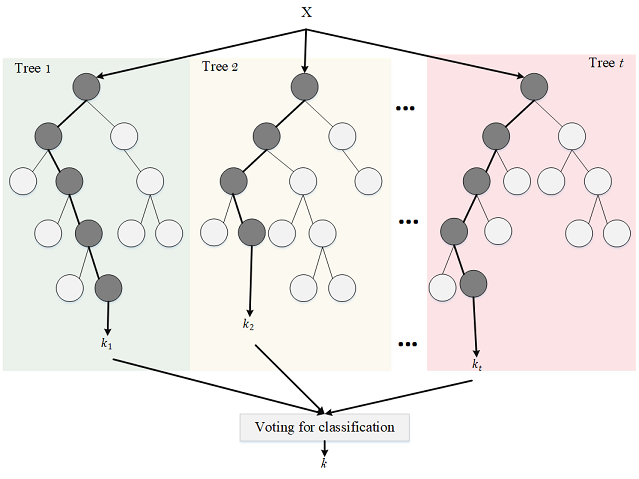

In [72]:
run_classification(RandomForestClassifier(n_estimators=100), X_train, X_test, y_train, y_test)

Estimator: Pipeline(memory=None,
         steps=[('vect',
                 CountVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.int64'>, encoding='utf-8',
                                 input='content', lowercase=True, max_df=1.0,
                                 max_features=None, min_df=1,
                                 ngram_range=(1, 1), preprocessor=None,
                                 stop_words=None, strip_accents=None,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, vocabulary=Non...
                 RandomForestClassifier(bootstrap=True, class_weight=None,
                                        criterion='gini', max_depth=None,
                                        max_features='auto',
                                        max_leaf_nodes=None,
                                        min_impurity_d

In [73]:
run_classification(RandomForestClassifier(n_estimators=200), X_train, X_test, y_train, y_test)

Estimator: Pipeline(memory=None,
         steps=[('vect',
                 CountVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.int64'>, encoding='utf-8',
                                 input='content', lowercase=True, max_df=1.0,
                                 max_features=None, min_df=1,
                                 ngram_range=(1, 1), preprocessor=None,
                                 stop_words=None, strip_accents=None,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, vocabulary=Non...
                 RandomForestClassifier(bootstrap=True, class_weight=None,
                                        criterion='gini', max_depth=None,
                                        max_features='auto',
                                        max_leaf_nodes=None,
                                        min_impurity_d

**Observations:**
- All of the following Statistical Machine learning algorithms we tried, are heavily overfitted. The training accuracy for all of them is coming to be more than 90%

- We'll be fine tuning the models and reduce the overfitting in next iteration.



## Neural Network
A Neural Network, unlike statistical ML algorithms, is a series of algorithms that endeavors to recognize underlying relationships in a set of data through a process that mimics the way the human brain operates. Neural networks can adapt to changing input; so the network generates the best possible result without needing to redesign the output criteria.

Define a function for checkpoints

In [74]:
#Path where you want to save the weights, model and checkpoints
model_path = "Weights/"
%mkdir Weights

# Define model callbacks
def call_backs(name):
    early_stopping = EarlyStopping(monitor='val_loss', min_delta=0.005, patience=100)
    model_checkpoint =  ModelCheckpoint(model_path + name + '_epoch{epoch:02d}_loss{val_loss:.4f}.h5',
                                                               monitor='val_loss',
                                                               verbose=1,
                                                               save_best_only=True,
                                                               save_weights_only=False,
                                                               mode='min',
                                                               period=1)
    return [model_checkpoint, early_stopping]

A subdirectory or file Weights already exists.


### <u>Deep Neural Networks</u>
Deep Neural Networks architectures are designed to learn through multiple connection of layers where each single layer only receives connection from previous and provides connections only to the next layer in hidden part. The input is a connection of feature space (As discussed in Section Feature_extraction with first hidden layer. For Deep Neural Networks (DNN), input layer could be tf-ifd, word embedding, or etc. as shown in standard DNN in Figure. The output layer houses neurons equal to the number of classes for multi-class classification and only one neuron for binary classification. But our main contribution in this paper is that we have many trained DNNs to serve different purposes. Here, we have multi-class DNNs where each learning model is generated randomly (number of nodes in each layer as well as the number of layers are randomly assigned). Our implementation of Deep Neural Network (DNN) is basically a discriminatively trained model that uses standard back-propagation algorithm and sigmoid or ReLU as activation functions. The output layer for multi-class classification should use Softmax.

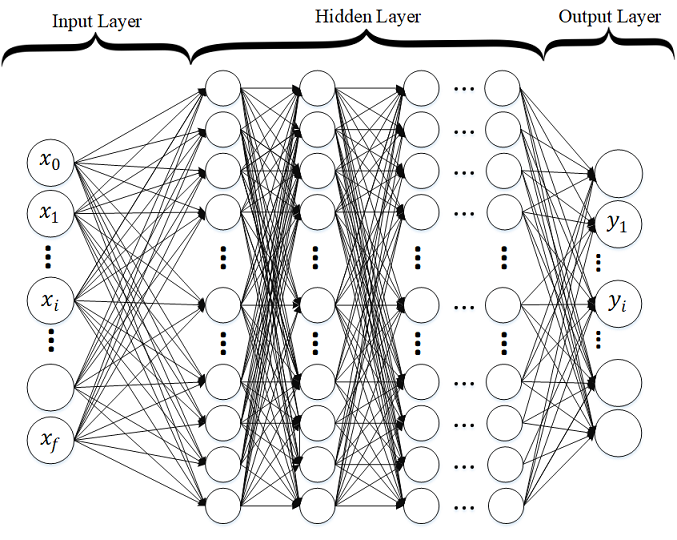

In [75]:
# Function to build Deep NN
def Build_Model_DNN_Text(shape, nClasses, dropout=0.3):
    """
    buildModel_DNN_Tex(shape, nClasses,dropout)
    Build Deep neural networks Model for text classification
    Shape is input feature space
    nClasses is number of classes
    """
    model = tf.keras.Sequential()
    node = 512 # number of nodes
    nLayers = 4 # number of  hidden layer
    model.add(Dense(node,input_dim=shape,activation='relu'))
    model.add(Dropout(dropout))
    for i in range(0,nLayers):
        model.add(Dense(node,input_dim=node,activation='relu'))
        model.add(Dropout(dropout))
        model.add(BatchNormalization())
    model.add(Dense(nClasses, activation='softmax'))
    model.compile(loss='sparse_categorical_crossentropy',
                  optimizer='adam',
                  metrics=['accuracy'])
    print(model.summary())
    return model

In [76]:
Tfidf_vect = TfidfVectorizer(max_features=5000)
Tfidf_vect.fit(ticket.Summary)
X_train_tfidf = Tfidf_vect.transform(X_train)
X_test_tfidf = Tfidf_vect.transform(X_test)

# Instantiate the network
model_DNN = Build_Model_DNN_Text(X_train_tfidf.shape[1], 75)

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 512)               2560512   
_________________________________________________________________
dropout (Dropout)            (None, 512)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 512)               262656    
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
_________________________________________________________________
batch_normalization (BatchNo (None, 512)               2048      
_________________________________________________________________
dense_2 (Dense)              (None, 512)               262656    
_________________________________________

In [77]:
model_DNN.fit(X_train_tfidf, y_train,
                              validation_data=(X_test_tfidf, y_test),
                              callbacks=call_backs("NN"),
                              epochs=10,
                              batch_size=128,
                              verbose=2)
predicted = model_DNN.predict(X_test_tfidf)

Train on 8172 samples, validate on 2043 samples
Epoch 1/10

Epoch 00001: val_loss improved from inf to 3.48422, saving model to Weights/NN_epoch01_loss3.4842.h5
8172/8172 - 7s - loss: 2.4094 - acc: 0.5056 - val_loss: 3.4842 - val_acc: 0.0362
Epoch 2/10

Epoch 00002: val_loss did not improve from 3.48422
8172/8172 - 4s - loss: 0.9062 - acc: 0.7774 - val_loss: 4.1795 - val_acc: 0.0220
Epoch 3/10

Epoch 00003: val_loss did not improve from 3.48422
8172/8172 - 4s - loss: 0.7222 - acc: 0.8078 - val_loss: 4.5263 - val_acc: 0.0103
Epoch 4/10

Epoch 00004: val_loss did not improve from 3.48422
8172/8172 - 5s - loss: 0.6095 - acc: 0.8320 - val_loss: 4.3059 - val_acc: 0.0215
Epoch 5/10

Epoch 00005: val_loss improved from 3.48422 to 3.32348, saving model to Weights/NN_epoch05_loss3.3235.h5
8172/8172 - 7s - loss: 0.4970 - acc: 0.8600 - val_loss: 3.3235 - val_acc: 0.2726
Epoch 6/10

Epoch 00006: val_loss improved from 3.32348 to 2.16836, saving model to Weights/NN_epoch06_loss2.1684.h5
8172/8172 -

### <u>Extract Glove Embeddings</u>
- Extract Glove 6Billion word embeddings. We're going to use the 100d and 200d file which has 100 and 200 embedding dimensions for each word in the corpus respectively.

In [78]:
# Check if it is already extracted else Open the zipped file as readonly
if not os.path.isfile('glove/glove.6B.100d.txt'):
    glove_embeddings = 'glove.6B.zip'
    with ZipFile(glove_embeddings, 'r') as archive:
        archive.extractall('glove')

# List the files under extracted folder
os.listdir('glove')

['glove.6B.100d.txt',
 'glove.6B.200d.txt',
 'glove.6B.300d.txt',
 'glove.6B.50d.txt']

### <u>Convolutional Neural Networks (CNN)</u>
Another deep learning architecture that is employed for hierarchical document classification is Convolutional Neural Networks (CNN) . Although originally built for image processing with architecture similar to the visual cortex, CNNs have also been effectively used for text classification. In a basic CNN for image processing, an image tensor is convolved with a set of kernels of size d by d. These convolution layers are called feature maps and can be stacked to provide multiple filters on the input. To reduce the computational complexity, CNNs use pooling which reduces the size of the output from one layer to the next in the network. Different pooling techniques are used to reduce outputs while preserving important features.


The most common pooling method is max pooling where the maximum element is selected from the pooling window. In order to feed the pooled output from stacked featured maps to the next layer, the maps are flattened into one column. The final layers in a CNN are typically fully connected dense layers. In general, during the back-propagation step of a convolutional neural network not only the weights are adjusted but also the feature detector filters. A potential problem of CNN used for text is the number of ‘channels’, Sigma (size of the feature space). This might be very large (e.g. 50K), for text but for images this is less of a problem (e.g. only 3 channels of RGB). This means the dimensionality of the CNN for text is very high.

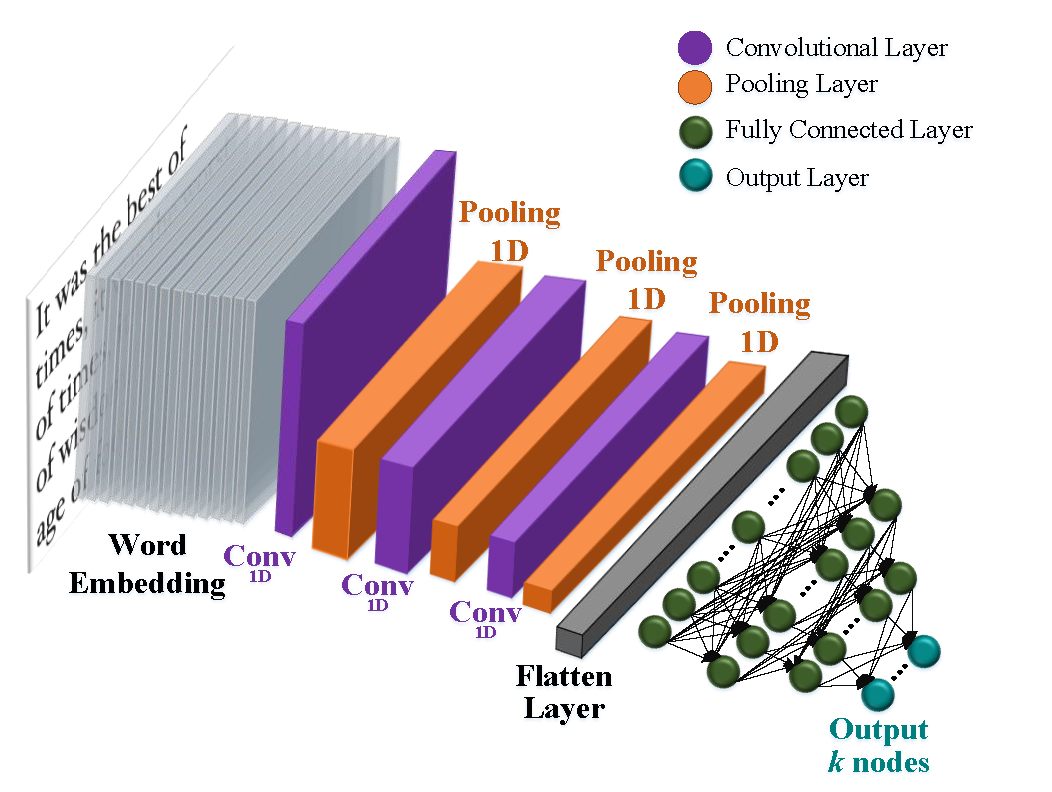

In [84]:
gloveFileName = 'glove/glove.6B.200d.txt'
MAX_SEQUENCE_LENGTH = 500
EMBEDDING_DIM=200
MAX_NB_WORDS=75000

# Function to generate Embedding
def loadData_Tokenizer(X_train, X_test,filename):
    np.random.seed(7)
    text = np.concatenate((X_train, X_test), axis=0)
    text = np.array(text)
    tokenizer = Tokenizer(num_words=MAX_NB_WORDS)
    tokenizer.fit_on_texts(text)
    sequences = tokenizer.texts_to_sequences(text)
    word_index = tokenizer.word_index
    text = pad_sequences(sequences, maxlen=MAX_SEQUENCE_LENGTH)
    print('Found %s unique tokens.' % len(word_index))
    indices = np.arange(text.shape[0])
    # np.random.shuffle(indices)
    text = text[indices]
    print(text.shape)
    X_train = text[0:len(X_train), ]
    X_test = text[len(X_train):, ]
    embeddings_index = {}
    f = open(filename, encoding="utf8")
    for line in f:
        values = line.split()
        word = values[0]
        try:
            coefs = np.asarray(values[1:], dtype='float32')
        except:
            pass
        embeddings_index[word] = coefs
    f.close()
    print('Total %s word vectors.' % len(embeddings_index))
    return (X_train, X_test, word_index,embeddings_index)


embedding_matrix = []

def buildEmbed_matrices(word_index,embedding_dim):
    embedding_matrix = np.random.random((len(word_index) + 1, embedding_dim))
    for word, i in word_index.items():
        embedding_vector = embeddings_index.get(word)
        if embedding_vector is not None:
            # words not found in embedding index will be all-zeros.
            if len(embedding_matrix[i]) !=len(embedding_vector):
                print("could not broadcast input array from shape",str(len(embedding_matrix[i])), "into shape",str(len(embedding_vector)),
                      " Please make sure your"" EMBEDDING_DIM is equal to embedding_vector file ,GloVe,")
                exit(1)
            embedding_matrix[i] = embedding_vector
    return embedding_matrix

In [85]:
# Generate Glove embedded datasets
X_train_Glove, X_test_Glove, word_index, embeddings_index = loadData_Tokenizer(X_train,X_test,gloveFileName)
embedding_matrix = buildEmbed_matrices(word_index,EMBEDDING_DIM)

Found 8774 unique tokens.
(10215, 500)
Total 400000 word vectors.


In [86]:
def Build_Model_CNN_Text(word_index, embeddings_matrix, nclasses,dropout=0.5):
    """
        def buildModel_CNN(word_index, embeddings_index, nclasses, MAX_SEQUENCE_LENGTH=500, EMBEDDING_DIM=50, dropout=0.5):
        word_index in word index ,
        embeddings_index is embeddings index, look at data_helper.py
        nClasses is number of classes,
        MAX_SEQUENCE_LENGTH is maximum lenght of text sequences,
        EMBEDDING_DIM is an int value for dimention of word embedding look at data_helper.py
    """
    model = Sequential()
    embedding_layer = Embedding(len(word_index) + 1,
                                EMBEDDING_DIM,
                                weights=[embeddings_matrix],
                                input_length=MAX_SEQUENCE_LENGTH,
                                trainable=True)
    # applying a more complex convolutional approach
    convs = []
    filter_sizes = []
    layer = 5
    print("Filter  ",layer)
    for fl in range(0,layer):
        filter_sizes.append((fl+2))
    node = 128
    sequence_input = Input(shape=(MAX_SEQUENCE_LENGTH,), dtype='int32')
    embedded_sequences = embedding_layer(sequence_input)
    for fsz in filter_sizes:
        l_conv = Conv1D(node, kernel_size=fsz, activation='relu')(embedded_sequences)
        l_pool = MaxPooling1D(5)(l_conv)
        #l_pool = Dropout(0.25)(l_pool)
        convs.append(l_pool)
    l_merge = Concatenate(axis=1)(convs)
    l_cov1 = Conv1D(node, 5, activation='relu')(l_merge)
    l_cov1 = Dropout(dropout)(l_cov1)
    l_batch1 = BatchNormalization()(l_cov1)
    l_pool1 = MaxPooling1D(5)(l_batch1)
    l_cov2 = Conv1D(node, 5, activation='relu')(l_pool1)
    l_cov2 = Dropout(dropout)(l_cov2)
    l_batch2 = BatchNormalization()(l_cov2)
    l_pool2 = MaxPooling1D(30)(l_batch2)
    l_flat = Flatten()(l_pool2)
    l_dense = Dense(1024, activation='relu')(l_flat)
    l_dense = Dropout(dropout)(l_dense)
    l_dense = Dense(512, activation='relu')(l_dense)
    l_dense = Dropout(dropout)(l_dense)
    preds = Dense(nclasses, activation='softmax')(l_dense)
    model = Model(sequence_input, preds)
    model.compile(loss='sparse_categorical_crossentropy',
                  optimizer='adam',
                  metrics=['accuracy'])
    
    print(model.summary())
    return model

In [88]:
# Train the network 
model_CNN = Build_Model_CNN_Text(word_index,embedding_matrix, 75)


Filter   5
Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 500)]        0                                            
__________________________________________________________________________________________________
embedding_1 (Embedding)         (None, 500, 200)     1755000     input_2[0][0]                    
__________________________________________________________________________________________________
conv1d_7 (Conv1D)               (None, 499, 128)     51328       embedding_1[0][0]                
__________________________________________________________________________________________________
conv1d_8 (Conv1D)               (None, 498, 128)     76928       embedding_1[0][0]                
_________________________________________________________________________________

In [89]:
# run classification
run_classification(model_CNN, X_train_Glove, X_test_Glove, y_train, y_test,pipelineRequired = False,isDeepModel=True, arch_name='CNN')

Train on 8172 samples, validate on 2043 samples
Epoch 1/10
8064/8172 [============================>.] - ETA: 5s - loss: 3.0114 - acc: 0.2904 
Epoch 00001: val_loss improved from inf to 3.07637, saving model to Weights/CNN_epoch01_loss3.0764.h5
8172/8172 [==============================] - 424s 52ms/sample - loss: 3.0060 - acc: 0.2907 - val_loss: 3.0764 - val_acc: 0.3348
Epoch 2/10
8064/8172 [============================>.] - ETA: 5s - loss: 2.4777 - acc: 0.3353 
Epoch 00002: val_loss did not improve from 3.07637
8172/8172 [==============================] - 424s 52ms/sample - loss: 2.4782 - acc: 0.3358 - val_loss: 3.3099 - val_acc: 0.2511
Epoch 3/10
8064/8172 [============================>.] - ETA: 3s - loss: 2.2283 - acc: 0.3764
Epoch 00003: val_loss did not improve from 3.07637
8172/8172 [==============================] - 280s 34ms/sample - loss: 2.2282 - acc: 0.3760 - val_loss: 3.0889 - val_acc: 0.3519
Epoch 4/10
8064/8172 [============================>.] - ETA: 3s - loss: 1.9698 - ac

### <u>Recurrent Neural Networks (RNN)</u>
RNN assigns more weights to the previous data points of sequence. Therefore, this technique is a powerful method for text, string and sequential data classification. Moreover, this technique could be used for image classification as we did in this work. In RNN, the neural net considers the information of previous nodes in a very sophisticated method which allows for better semantic analysis of the structures in the dataset.

**Gated Recurrent Unit (GRU)**

Gated Recurrent Unit (GRU) is a gating mechanism for RNN which was introduced by J. Chung et al. and K.Cho et al.. GRU is a simplified variant of the LSTM architecture, but there are differences as follows: GRU contains two gates and does not possess any internal memory (as shown in Figure; and finally, a second non-linearity is not applied (tanh in Figure).

In [92]:
def Build_Model_RNN_Text(word_index, embeddings_matrix, nclasses,dropout=0.5):
    """
    def buildModel_RNN(word_index, embeddings_matrix, nclasses,  MAX_SEQUENCE_LENGTH=500, EMBEDDING_DIM=100, dropout=0.5):
    word_index in word index ,
    embeddings_matrix is embeddings_matrix, look at data_helper.py
    nClasses is number of classes,
    MAX_SEQUENCE_LENGTH is maximum lenght of text sequences
    """
    model = tf.keras.Sequential()
    hidden_layer = 3
    gru_node = 32
    
    model.add(Embedding(len(word_index) + 1,
                                EMBEDDING_DIM,
                                weights=[embeddings_matrix],
                                input_length=MAX_SEQUENCE_LENGTH,
                                trainable=True))
    print(gru_node)
    for i in range(0,hidden_layer):
        model.add(GRU(gru_node,return_sequences=True, recurrent_dropout=0.2))
        model.add(Dropout(dropout))
        model.add(BatchNormalization())
    model.add(GRU(gru_node, recurrent_dropout=0.2))
    model.add(Dropout(dropout))
    model.add(BatchNormalization())
    model.add(Dense(256, activation='relu'))
    model.add(BatchNormalization())
    model.add(Dense(nclasses, activation='softmax'))
    model.compile(loss='sparse_categorical_crossentropy',
                      optimizer='sgd',
                      metrics=['accuracy'])
    
    print(model.summary())
    return model

In [93]:
# Train the network and run classification
model_RNN = Build_Model_RNN_Text(word_index,embedding_matrix, 75)


32
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_3 (Embedding)      (None, 500, 200)          1755000   
_________________________________________________________________
gru (GRU)                    (None, 500, 32)           22368     
_________________________________________________________________
dropout_13 (Dropout)         (None, 500, 32)           0         
_________________________________________________________________
batch_normalization_8 (Batch (None, 500, 32)           128       
_________________________________________________________________
gru_1 (GRU)                  (None, 500, 32)           6240      
_________________________________________________________________
dropout_14 (Dropout)         (None, 500, 32)           0         
_________________________________________________________________
batch_normalization_9 (Batch (None, 500, 32)       

In [ ]:
run_classification(model_RNN, X_train_Glove, X_test_Glove, y_train, y_test,pipelineRequired = False,isDeepModel=True, arch_name='RNN')

### <u>RNN with LSTM networks</u>


Long Short-Term Memory~(LSTM) was introduced by S. Hochreiter and J. Schmidhuber and developed by many research scientists.

To deal with these problems Long Short-Term Memory (LSTM) is a special type of RNN that preserves long term dependency in a more effective way compared to the basic RNNs. This is particularly useful to overcome vanishing gradient problem as LSTM uses multiple gates to carefully regulate the amount of information that will be allowed into each node state. The figure shows the basic cell of a LSTM model.

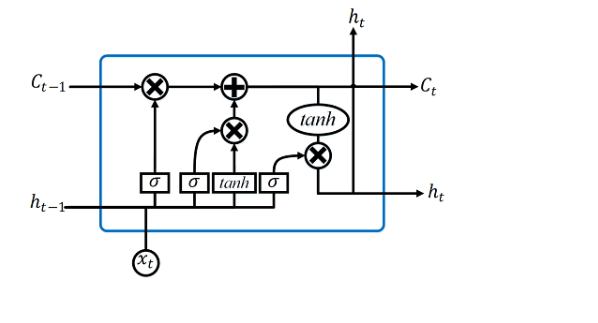

Let's create another column of categorical datatype from Assignment groups. Let's write some generic methods for utilities and to plot evaluation metrics.

In [95]:
# Load the balanced dataset
with open('balanced_ticket.pkl','rb') as f:
    ticket = pickle.load(f)
# Load the Word2Vec model
wmodel = Doc2Vec.load('d2v_inc_model.mdl')

In [96]:
ticket.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10215 entries, 0 to 10214
Data columns (total 2 columns):
Summary             10215 non-null object
Assignment group    10215 non-null object
dtypes: object(2)
memory usage: 159.7+ KB


In [97]:
w2v_weights = wmodel.wv.vectors
vocab_size, embedding_size = w2v_weights.shape
print("Vocabulary Size: {} - Embedding Dim: {}".format(vocab_size, embedding_size))

Vocabulary Size: 12421 - Embedding Dim: 300


In [98]:
# The maximum number of words to be used. (most frequent)
MAX_NB_WORDS = 50000
# Max number of words in each complaint.
MAX_SEQUENCE_LENGTH =75
# This is fixed.
EMBEDDING_DIM = 100

tokenizer = Tokenizer(num_words=vocab_size, lower=True)
tokenizer.fit_on_texts(ticket['Summary'].values)
word_index = tokenizer.word_index
print('Found %s unique tokens.' % len(word_index))

Found 8774 unique tokens.


In [99]:
set_X = tokenizer.texts_to_sequences(ticket['Summary'].values)
set_X = pad_sequences(set_X, maxlen=MAX_SEQUENCE_LENGTH, padding='pre', value=0)
y = pd.get_dummies(ticket['Assignment group']).values

In [100]:
# Divide the original dataset into train and test split
X_train, X_test, y_train, y_test = train_test_split(set_X, y, test_size=0.3, random_state=47)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((7150, 75), (3065, 75), (7150, 41), (3065, 41))

In [101]:
# Visualize a random training sample
X_train[67]

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0, 17, 17, 31,  5, 32, 15, 14,  7, 65, 47, 19,
       11, 17, 17, 31,  5, 32, 15])

In [102]:
# CREATE the MODEL

# Samples of categories with less than this number of samples will be ignored
DROP_THRESHOLD = 10000
model_seq = tf.keras.Sequential()
model_seq.add(Embedding(input_dim=vocab_size, 
                        output_dim=embedding_size, 
                        weights=[w2v_weights], 
                        input_length=MAX_SEQUENCE_LENGTH, 
                        mask_zero=True,
                        trainable=False))
model_seq.add(SpatialDropout1D(0.2))
model_seq.add(LSTM(100, dropout=0.2, recurrent_dropout=0.2))
model_seq.add(Dense(41, activation='softmax'))
model_seq.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

model_seq.summary()


Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_4 (Embedding)      (None, 75, 300)           3726300   
_________________________________________________________________
spatial_dropout1d (SpatialDr (None, 75, 300)           0         
_________________________________________________________________
lstm (LSTM)                  (None, 100)               160400    
_________________________________________________________________
dense_14 (Dense)             (None, 41)                4141      
Total params: 3,890,841
Trainable params: 164,541
Non-trainable params: 3,726,300
_________________________________________________________________


In [103]:
epochs = 20
batch_size = 64

history = model_seq.fit(X_train, 
                        y_train, 
                        epochs=epochs, 
                        batch_size=batch_size,
                        validation_data=(X_test, y_test),
                        callbacks=[EarlyStopping(monitor='val_loss', patience=3, min_delta=0.0001)])

Train on 7150 samples, validate on 3065 samples
Epoch 1/20
7150/7150 [==============================] - 42s 6ms/sample - loss: 2.0711 - acc: 0.4901 - val_loss: 1.6017 - val_acc: 0.5990
Epoch 2/20
7150/7150 [==============================] - 39s 6ms/sample - loss: 1.4472 - acc: 0.6583 - val_loss: 1.2814 - val_acc: 0.6982
Epoch 3/20
7150/7150 [==============================] - 42s 6ms/sample - loss: 1.1985 - acc: 0.7232 - val_loss: 1.1005 - val_acc: 0.7494
Epoch 4/20
7150/7150 [==============================] - 39s 5ms/sample - loss: 1.0372 - acc: 0.7557 - val_loss: 0.9877 - val_acc: 0.7693
Epoch 5/20
7150/7150 [==============================] - 40s 6ms/sample - loss: 0.9203 - acc: 0.7776 - val_loss: 0.9153 - val_acc: 0.7729
Epoch 6/20
7150/7150 [==============================] - 40s 6ms/sample - loss: 0.8439 - acc: 0.7876 - val_loss: 0.8799 - val_acc: 0.7778
Epoch 7/20
7150/7150 [==============================] - 42s 6ms/sample - loss: 0.7690 - acc: 0.7964 - val_loss: 0.8197 - val_acc: 

In [104]:
rounded_labels=np.argmax(y_test, axis=1)
rounded_labels[1]

0

In [105]:
y_pred = model_seq.predict(X_test, batch_size=64, verbose=1)
y_pred_bool = np.argmax(y_pred, axis=1)

print(classification_report(rounded_labels, y_pred_bool))

3065/3065 [==============================] - 5s 2ms/sample
              precision    recall  f1-score   support

           0       0.97      0.97      0.97       337
           1       0.96      1.00      0.98       314
           2       0.99      1.00      0.99       329
           3       0.93      1.00      0.96       289
           4       0.00      0.00      0.00         4
           5       0.60      0.22      0.32        27
           6       0.00      0.00      0.00         4
           7       0.46      0.50      0.48        64
           8       0.23      0.21      0.22        34
           9       0.16      0.14      0.15        21
          10       0.00      0.00      0.00         7
          11       0.24      0.36      0.29        14
          12       0.73      1.00      0.84         8
          13       0.08      0.08      0.08        12
          14       0.24      0.15      0.18        41
          15       0.51      0.53      0.52        45
          16       0.0

In [106]:
## Iteration 1 ...changing the dropout value

model_seq = tf.keras.Sequential()
model_seq.add(Embedding(input_dim=vocab_size, 
                        output_dim=embedding_size, 
                        weights=[w2v_weights], 
                        input_length=MAX_SEQUENCE_LENGTH, 
                        mask_zero=True,
                        trainable=False))
model_seq.add(SpatialDropout1D(0.1))
model_seq.add(LSTM(100, dropout=0.1, recurrent_dropout=0.1))
model_seq.add(Dense(41, activation='softmax'))
model_seq.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

history = model_seq.fit(X_train, 
                        y_train, 
                        epochs=epochs, 
                        batch_size=batch_size,
                        validation_data=(X_test, y_test),
                        callbacks=[EarlyStopping(monitor='val_loss', patience=3, min_delta=0.0001)])

Train on 7150 samples, validate on 3065 samples
Epoch 1/20
7150/7150 [==============================] - 60s 8ms/sample - loss: 1.9545 - acc: 0.5292 - val_loss: 1.4725 - val_acc: 0.6653
Epoch 2/20
7150/7150 [==============================] - 52s 7ms/sample - loss: 1.2704 - acc: 0.7140 - val_loss: 1.1451 - val_acc: 0.7507
Epoch 3/20
7150/7150 [==============================] - 55s 8ms/sample - loss: 1.0203 - acc: 0.7674 - val_loss: 0.9911 - val_acc: 0.7697
Epoch 4/20
7150/7150 [==============================] - 54s 8ms/sample - loss: 0.8669 - acc: 0.7857 - val_loss: 0.8899 - val_acc: 0.7821
Epoch 5/20
7150/7150 [==============================] - 55s 8ms/sample - loss: 0.7497 - acc: 0.8036 - val_loss: 0.8244 - val_acc: 0.7958
Epoch 6/20
7150/7150 [==============================] - 61s 9ms/sample - loss: 0.6653 - acc: 0.8213 - val_loss: 0.7831 - val_acc: 0.7980
Epoch 7/20
7150/7150 [==============================] - 61s 8ms/sample - loss: 0.5914 - acc: 0.8376 - val_loss: 0.7246 - val_acc: 

In [108]:
rounded_labels=np.argmax(y_test, axis=1)
rounded_labels[1]

0

In [109]:
y_pred = model_seq.predict(X_test, batch_size=64, verbose=1)
y_pred_bool = np.argmax(y_pred, axis=1)

print(classification_report(rounded_labels, y_pred_bool))

3065/3065 [==============================] - ETA: 0s E - 6s 2ms/sample
              precision    recall  f1-score   support

           0       0.93      0.98      0.96       337
           1       0.95      1.00      0.97       314
           2       0.99      1.00      1.00       329
           3       0.95      1.00      0.97       289
           4       0.00      0.00      0.00         4
           5       0.57      0.30      0.39        27
           6       0.00      0.00      0.00         4
           7       0.50      0.52      0.51        64
           8       0.28      0.38      0.33        34
           9       0.27      0.14      0.19        21
          10       0.00      0.00      0.00         7
          11       0.21      0.21      0.21        14
          12       0.89      1.00      0.94         8
          13       0.08      0.08      0.08        12
          14       0.19      0.10      0.13        41
          15       0.64      0.47      0.54        45
          

In [110]:
## Iteration 2 ....adding a dense and dropout and batchNormalistaion layer

model_seq = tf.keras.Sequential()
model_seq.add(Embedding(input_dim=vocab_size, 
                        output_dim=embedding_size, 
                        weights=[w2v_weights], 
                        input_length=MAX_SEQUENCE_LENGTH, 
                        mask_zero=True,
                        trainable=False))
model_seq.add(SpatialDropout1D(0.1))
model_seq.add(LSTM(150, dropout=0.1, recurrent_dropout=0.1))
model_seq.add(Dense(150, activation='relu'))
model_seq.add(BatchNormalization(momentum=0.9,epsilon=0.02))
model_seq.add(Dropout(0.1))
model_seq.add(Dense(41, activation='softmax'))
model_seq.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

history = model_seq.fit(X_train, 
                        y_train, 
                        epochs=epochs, 
                        batch_size=batch_size,
                        validation_split=0.1,
                        callbacks=[EarlyStopping(monitor='val_loss', patience=3, min_delta=0.0001)])

Train on 6435 samples, validate on 715 samples
Epoch 1/20
6435/6435 [==============================] - 103s 16ms/sample - loss: 2.0987 - acc: 0.5388 - val_loss: 1.1828 - val_acc: 0.7315
Epoch 2/20
6435/6435 [==============================] - 95s 15ms/sample - loss: 1.1292 - acc: 0.7411 - val_loss: 0.9107 - val_acc: 0.8000
Epoch 3/20
6435/6435 [==============================] - 97s 15ms/sample - loss: 0.8857 - acc: 0.7804 - val_loss: 0.8256 - val_acc: 0.8084
Epoch 4/20
6435/6435 [==============================] - 100s 16ms/sample - loss: 0.7358 - acc: 0.8014 - val_loss: 0.8314 - val_acc: 0.8210
Epoch 5/20
6435/6435 [==============================] - 94s 15ms/sample - loss: 0.5816 - acc: 0.8373 - val_loss: 0.7471 - val_acc: 0.8224
Epoch 6/20
6435/6435 [==============================] - 102s 16ms/sample - loss: 0.4964 - acc: 0.8586 - val_loss: 0.7474 - val_acc: 0.8322
Epoch 7/20
6435/6435 [==============================] - 101s 16ms/sample - loss: 0.4101 - acc: 0.8852 - val_loss: 0.8022 -

In [112]:
rounded_labels=np.argmax(y_test, axis=1)
rounded_labels[1]

0

In [113]:
y_pred = model_seq.predict(X_test, batch_size=64, verbose=1)
y_pred_bool = np.argmax(y_pred, axis=1)

print(classification_report(rounded_labels, y_pred_bool))

3065/3065 [==============================] - 22s 7ms/sample
              precision    recall  f1-score   support

           0       0.92      1.00      0.96       337
           1       0.95      1.00      0.97       314
           2       0.98      1.00      0.99       329
           3       0.93      1.00      0.96       289
           4       0.00      0.00      0.00         4
           5       0.60      0.22      0.32        27
           6       0.00      0.00      0.00         4
           7       0.37      0.48      0.42        64
           8       0.19      0.09      0.12        34
           9       0.09      0.10      0.09        21
          10       0.00      0.00      0.00         7
          11       0.11      0.07      0.09        14
          12       1.00      0.88      0.93         8
          13       0.00      0.00      0.00        12
          14       0.14      0.10      0.12        41
          15       0.61      0.49      0.54        45
          16       0.

In [114]:
## iteration 3 ...optimizing adam
from keras.optimizers import Adam

adam = tf.keras.optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-08, decay=0.0, amsgrad=False)

In [115]:
model_seq = tf.keras.Sequential()
model_seq.add(Embedding(input_dim=vocab_size, 
                        output_dim=embedding_size, 
                        weights=[w2v_weights], 
                        input_length=MAX_SEQUENCE_LENGTH, 
                        mask_zero=True,
                        trainable=False))
model_seq.add(SpatialDropout1D(0.1))
model_seq.add(LSTM(150, dropout=0.1, recurrent_dropout=0.1))
model_seq.add(Dense(150, activation='relu'))
model_seq.add(BatchNormalization(momentum=0.9,epsilon=0.02))
model_seq.add(Dropout(0.1))
model_seq.add(Dense(41, activation='softmax'))
model_seq.compile(loss='categorical_crossentropy', optimizer=adam, metrics=['accuracy'])

history = model_seq.fit(X_train, 
                        y_train, 
                        epochs=epochs, 
                        batch_size=batch_size,
                        validation_data=(X_test, y_test),
                        callbacks=[EarlyStopping(monitor='val_loss', patience=3, min_delta=0.0001)])

Train on 7150 samples, validate on 3065 samples
Epoch 1/20
7150/7150 [==============================] - 153s 21ms/sample - loss: 1.9872 - acc: 0.5688 - val_loss: 1.2054 - val_acc: 0.7227
Epoch 2/20
7150/7150 [==============================] - 141s 20ms/sample - loss: 1.0757 - acc: 0.7571 - val_loss: 0.9839 - val_acc: 0.7693
Epoch 3/20
7150/7150 [==============================] - 136s 19ms/sample - loss: 0.8422 - acc: 0.7880 - val_loss: 0.8603 - val_acc: 0.7788
Epoch 4/20
7150/7150 [==============================] - 133s 19ms/sample - loss: 0.6822 - acc: 0.8200 - val_loss: 0.8067 - val_acc: 0.7954
Epoch 5/20
7150/7150 [==============================] - 147s 21ms/sample - loss: 0.5560 - acc: 0.8448 - val_loss: 0.7774 - val_acc: 0.8072
Epoch 6/20
7150/7150 [==============================] - 150s 21ms/sample - loss: 0.4561 - acc: 0.8683 - val_loss: 0.7771 - val_acc: 0.8166
Epoch 7/20
7150/7150 [==============================] - 159s 22ms/sample - loss: 0.3774 - acc: 0.8943 - val_loss: 0.80

In [116]:
rounded_labels=np.argmax(y_test, axis=1)
rounded_labels[1]

0

In [117]:
y_pred = model_seq.predict(X_test, batch_size=64, verbose=1)
y_pred_bool = np.argmax(y_pred, axis=1)

print(classification_report(rounded_labels, y_pred_bool))

3065/3065 [==============================] - 27s 9ms/sample
              precision    recall  f1-score   support

           0       0.91      1.00      0.95       337
           1       0.97      1.00      0.98       314
           2       0.99      1.00      0.99       329
           3       0.91      1.00      0.95       289
           4       0.00      0.00      0.00         4
           5       0.54      0.26      0.35        27
           6       0.00      0.00      0.00         4
           7       0.53      0.44      0.48        64
           8       0.35      0.21      0.26        34
           9       0.17      0.10      0.12        21
          10       0.50      0.29      0.36         7
          11       0.05      0.07      0.06        14
          12       0.88      0.88      0.88         8
          13       0.00      0.00      0.00        12
          14       0.18      0.12      0.14        41
          15       0.46      0.51      0.48        45
          16       0.

In [118]:
## Iteration 4 ..adding more core to LTSM

model_seq = tf.keras.Sequential()
model_seq.add(Embedding(input_dim=vocab_size, 
                        output_dim=embedding_size, 
                        weights=[w2v_weights], 
                        input_length=MAX_SEQUENCE_LENGTH, 
                        mask_zero=True,
                        trainable=False))
model_seq.add(SpatialDropout1D(0.1))
model_seq.add(LSTM(200, dropout=0.2, recurrent_dropout=0.1))
model_seq.add(Dense(41, activation='softmax'))
model_seq.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

history = model_seq.fit(X_train, 
                        y_train, 
                        epochs=epochs, 
                        batch_size=batch_size,
                        validation_data=(X_test, y_test),
                        callbacks=[EarlyStopping(monitor='val_loss', patience=3, min_delta=0.0001)])

Train on 7150 samples, validate on 3065 samples
Epoch 1/20
7150/7150 [==============================] - 207s 29ms/sample - loss: 1.8143 - acc: 0.5585 - val_loss: 1.3257 - val_acc: 0.7005
Epoch 2/20
7150/7150 [==============================] - 199s 28ms/sample - loss: 1.1728 - acc: 0.7305 - val_loss: 1.0700 - val_acc: 0.7553
Epoch 3/20
7150/7150 [==============================] - 212s 30ms/sample - loss: 0.9240 - acc: 0.7744 - val_loss: 0.9182 - val_acc: 0.7706
Epoch 4/20
7150/7150 [==============================] - 233s 33ms/sample - loss: 0.7610 - acc: 0.8000 - val_loss: 0.8142 - val_acc: 0.7922
Epoch 5/20
7150/7150 [==============================] - 227s 32ms/sample - loss: 0.6362 - acc: 0.8243 - val_loss: 0.7427 - val_acc: 0.8069
Epoch 6/20
7150/7150 [==============================] - 223s 31ms/sample - loss: 0.5409 - acc: 0.8501 - val_loss: 0.7123 - val_acc: 0.8144
Epoch 7/20
7150/7150 [==============================] - 237s 33ms/sample - loss: 0.4524 - acc: 0.8720 - val_loss: 0.71

In [119]:
rounded_labels=np.argmax(y_test, axis=1)
rounded_labels[1]

0

In [120]:
y_pred = model_seq.predict(X_test, batch_size=64, verbose=1)
y_pred_bool = np.argmax(y_pred, axis=1)

print(classification_report(rounded_labels, y_pred_bool))

3065/3065 [==============================] - 41s 13ms/sample
              precision    recall  f1-score   support

           0       0.97      0.97      0.97       337
           1       0.94      1.00      0.97       314
           2       0.99      1.00      1.00       329
           3       0.94      1.00      0.97       289
           4       0.00      0.00      0.00         4
           5       0.35      0.30      0.32        27
           6       0.00      0.00      0.00         4
           7       0.60      0.48      0.53        64
           8       0.21      0.18      0.19        34
           9       0.33      0.24      0.28        21
          10       0.00      0.00      0.00         7
          11       0.38      0.21      0.27        14
          12       0.73      1.00      0.84         8
          13       0.00      0.00      0.00        12
          14       0.27      0.29      0.28        41
          15       0.55      0.58      0.57        45
          16       0

In [121]:
accr = model_seq.evaluate(X_test,y_test)
print('Test set\n  Loss: {:0.3f}\n  Accuracy: {:0.3f}'.format(accr[0],accr[1]*100))

3065/3065 [==============================] - 73s 24ms/sample - loss: 0.6913 - acc: 0.8281
Test set
  Loss: 0.691
  Accuracy: 82.806


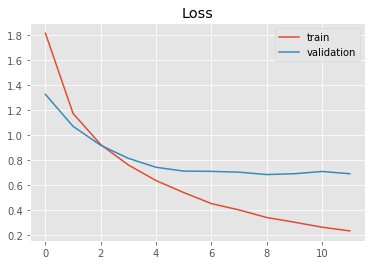

In [122]:
# Data Visualization
import matplotlib.pyplot as plt

plt.title('Loss')
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='validation')
plt.legend()
plt.show();

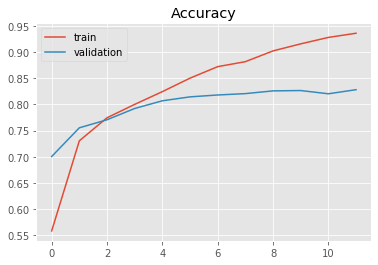

In [123]:
plt.title('Accuracy')
plt.plot(history.history['acc'], label='train')
plt.plot(history.history['val_acc'], label='validation')
plt.legend()
plt.show();

#### Finding Confidence Interval
As this iteration is having more accuracy and no overfitting, let's find out the confidence interval.

3065/3065 [==============================] - 62s 20ms/sample - loss: 0.6913 - acc: 0.8281
Test set
  Loss: 0.691
  Accuracy: 82.806


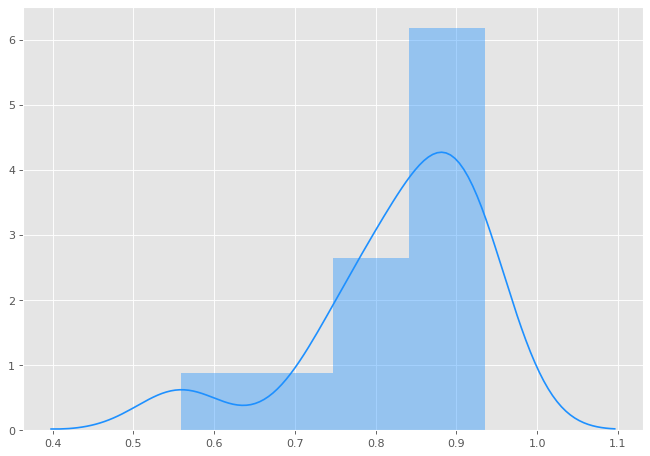

In [124]:
acc = history.history['acc']
plt.figure(figsize=(10,7), dpi= 80)
sns.distplot(acc, color="dodgerblue", label="Compact")
accr = model_seq.evaluate(X_test,y_test)
print('Test set\n  Loss: {:0.3f}\n  Accuracy: {:0.3f}'.format(accr[0],accr[1]*100))

##### **Observation**:
- There is a 85% likelihood that the confidence interval [80.5, 92.0] covers the true classification of the model on unseen data.

### Bi-Directional LSTM

In [4]:
# Load the preprocessed pickle dataset
VALIDATION_SPLIT = 0.2
# The maximum number of words to be used. (most frequent)
MAX_NB_WORDS = 50000
# Max number of words in each complaint.
MAX_SEQUENCE_LENGTH =75
# This is fixed.
EMBEDDING_DIM = 300
with open('balanced_ticket.pkl','rb') as f:
    ticket = pickle.load(f)
ticket.head()

,Summary,Assignment group
0,vip account unlock vip account unlock,GRP_0 (Access Issue)
1,office ask for license key office ask for lice...,GRP_0 (Access Issue)
2,globaltelecom broadband receive from vnetbgio....,GRP_0 (Access Issue)
3,windows account lockout windows account lockout,GRP_0 (Access Issue)
4,vpn connection issue vpn connection issue conn...,GRP_0 (Access Issue)


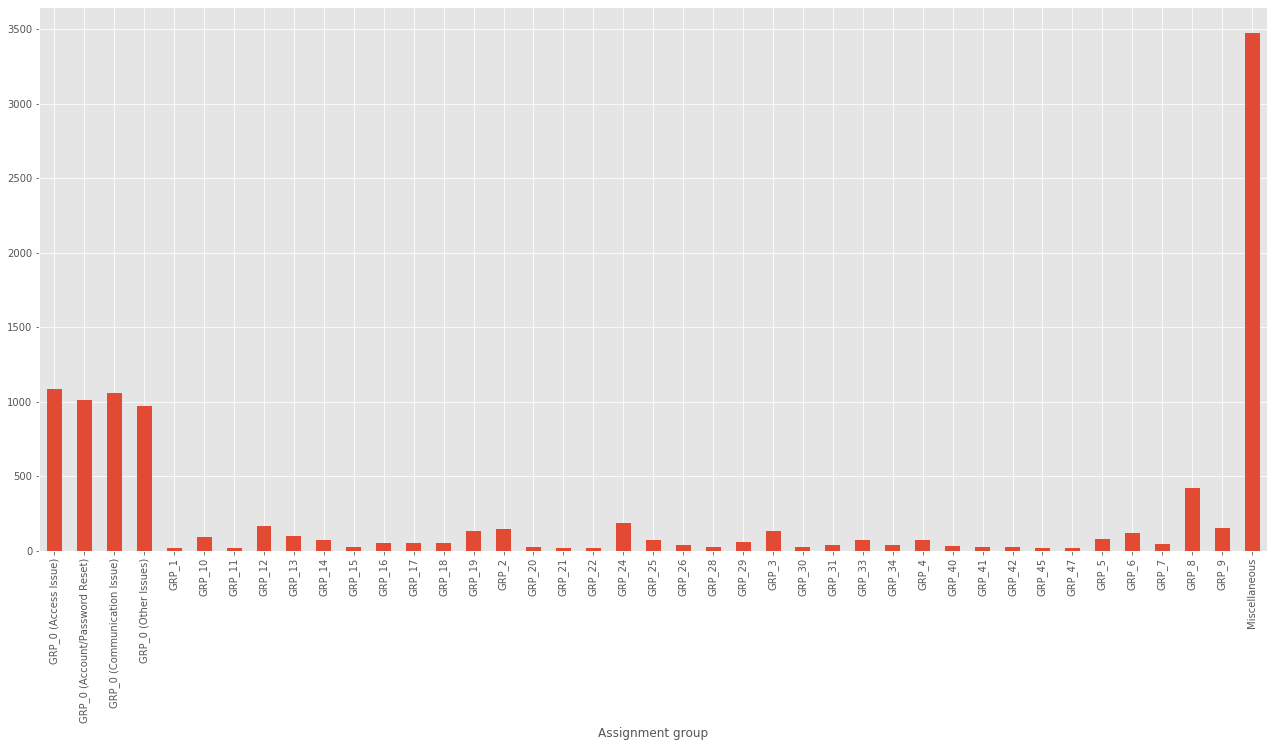

In [5]:
#print the Assignment group
fig = plt.figure(figsize=(22,10))
ticket.groupby('Assignment group').Summary.count().plot.bar(ylim=0)
plt.show();

In [6]:
# Encoding - one-hot
Y = pd.get_dummies(ticket['Assignment group']).values
print('Shape of Assignment group:', Y.shape)

Shape of Assignment group: (10215, 41)


In [7]:
#copy support case desc
support_ticket = ticket['Summary']

In [8]:
#Preparing data for the model.... Creating list
support_ticket = list(support_ticket)

In [9]:
# word count
ticket['Summary'].apply(lambda x: len(x.split(' '))).sum()

336378

In [11]:

texts = [] 

for line in tqdm_notebook(support_ticket, total=10215): 
    texts.append(line)

In [12]:
#random printing of data
print('Sample data:', texts[1123],Y[1123] )

Sample data: blank call gso loud noise blank call gso loud noise [0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0]


In [13]:
#Creating Token
tokenizer = Tokenizer(num_words=MAX_NB_WORDS)
tokenizer.fit_on_texts(texts)

In [14]:
# creating vocalabory 
sequences = tokenizer.texts_to_sequences(texts)
word_index = tokenizer.word_index
print('Vocabulary size:', len(word_index))

Vocabulary size: 8774


In [15]:
#Padding to make all sequences of the same length
data = pad_sequences(sequences, padding = 'post', maxlen = MAX_SEQUENCE_LENGTH)

print('Shape of data tensor:', data.shape)
print('Shape of label tensor:', Y.shape)

Shape of data tensor: (10215, 75)
Shape of label tensor: (10215, 41)


In [16]:
indices = np.arange(data.shape[0])
np.random.shuffle(indices)
data = data[indices]
labels =Y[indices]

In [17]:
num_validation_samples = int(VALIDATION_SPLIT*data.shape[0])
x_train = data[: -num_validation_samples]
y_train = labels[: -num_validation_samples]
x_val = data[-num_validation_samples: ]
y_val = labels[-num_validation_samples: ]


In [18]:
print('Number of entries in each category:')
print('training: ', y_train.sum(axis=0))
print('validation: ', y_val.sum(axis=0))

Number of entries in each category:
training:  [ 849  819  852  792   10   78    9  128   78   54   20   45   46   43
  112  116   16   15   13  147   58   27   20   41  106   20   28   61
   26   52   21   16   16   14   17   67   96   33  326  124 2761]
validation:  [237 190 205 179   7  12   5  36  17  15   2   9   6  10  19  26   7   0
   2  35  14  10   5  18  24   4   7  11  10  18   7   9   5   4   3  11
  19  10  91  30 714]


In [19]:
GLOVE_DIR = "glove/glove.6B."+str(EMBEDDING_DIM)+"d.txt"

In [20]:
#Use of Glove embedding
embeddings_index = {}
f = open(GLOVE_DIR,encoding="utf8")
print('Loading GloVe from:', GLOVE_DIR,'...', end='')
for line in f:
    values = line.split()
    word = values[0]
    embeddings_index[word] = np.asarray(values[1:], dtype='float32')
f.close()
print("Done.\n Proceeding with Embedding Matrix...", end="")

embedding_matrix = np.random.random((len(word_index) + 1, EMBEDDING_DIM))
for word, i in word_index.items():
    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None:
        embedding_matrix[i] = embedding_vector

Loading GloVe from: glove/glove.6B.300d.txt ...Done.
 Proceeding with Embedding Matrix...

In [21]:
vocab_size=len(tokenizer.word_index) +1
vocab_size

8775

In [23]:
### Embedding layer for hint 
model = tf.keras.Sequential()
model.add(Embedding(vocab_size, EMBEDDING_DIM,weights = [embedding_matrix],input_length = MAX_SEQUENCE_LENGTH,
                           trainable=True,name = 'embeddings'))
### Bidirectional LSTM layer 

model.add(Bidirectional(LSTM(128,return_sequences=False)))
#Drop out and dense layer
model.add(Dropout(rate=0.1))
model.add(Dense(41, activation='sigmoid'))

#complie of the model with optimzer 'adam'
model.compile(loss = 'categorical_crossentropy', optimizer='adam',metrics = ['accuracy'])

#summary of model
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embeddings (Embedding)       (None, 75, 300)           2632500   
_________________________________________________________________
bidirectional_1 (Bidirection (None, 256)               439296    
_________________________________________________________________
dropout_1 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 41)                10537     
Total params: 3,082,333
Trainable params: 3,082,333
Non-trainable params: 0
_________________________________________________________________


In [24]:
history=model.fit(x_train, y_train, epochs =20, batch_size=42, validation_data=(x_val, y_val), callbacks=[EarlyStopping(monitor='val_loss', patience=5, min_delta=0.0001)])

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Train on 8172 samples, validate on 2043 samples
Epoch 1/20
8172/8172 [==============================] - 203s 25ms/sample - loss: 2.0818 - acc: 0.3802 - val_loss: 1.4367 - val_acc: 0.6608
Epoch 2/20
8172/8172 [==============================] - 217s 27ms/sample - loss: 1.1166 - acc: 0.7420 - val_loss: 0.8940 - val_acc: 0.7856
Epoch 3/20
8172/8172 [==============================] - 213s 26ms/sample - loss: 0.7303 - acc: 0.8085 - val_loss: 0.6924 - val_acc: 0.8164
Epoch 4/20
8172/8172 [==============================] - 183s 22ms/sample - loss: 0.5531 - acc: 0.8489 - val_loss: 0.6250 - val_acc: 0.8336
Epoch 5/20
8172/8172 [==============================] - 231s 28ms/sample - loss: 0.4400 - acc: 0.8752 - val_loss: 0.5811 - val_acc: 0.8390
Epoch 6/20
8172/8172 [==============================] - 210s 26ms/sample - loss: 0.3545 - acc: 0.9001 - val_loss: 0.5487 - val_acc: 0.8468
Epoch 7/20
8172/8172 [==

In [26]:
loss = history.history['loss']
val_loss = history.history['val_loss']

In [27]:
print('Training Loss: ', loss)
print('Validation Loss: ', val_loss)

Training Loss:  [2.081834015692208, 1.1166035708001707, 0.7302590994582827, 0.5530851992194523, 0.43998402428215644, 0.35445617969734555, 0.28118002740187614, 0.23016437625296404, 0.1888469753051163, 0.15637533466240033, 0.1364367663184736, 0.1300722671058658, 0.11744778808862759]
Validation Loss:  [1.4366755487285172, 0.8940258685187621, 0.6924107486105876, 0.6250167811144466, 0.5810892967925723, 0.5487156549739417, 0.5353233501774624, 0.5232694819022555, 0.5243600877371128, 0.5336147493268425, 0.558633527873021, 0.5322551600164603, 0.5738265919615344]


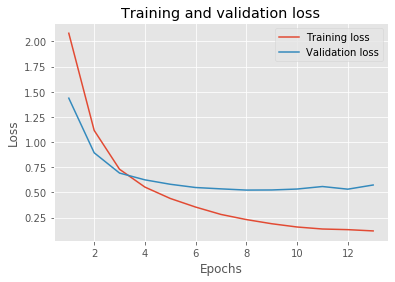

In [28]:
epochs = range(1, len(loss)+1)

plt.plot(epochs, loss, label='Training loss')
plt.plot(epochs, val_loss, label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show();

In [29]:
accuracy = history.history['acc']
val_accuracy = history.history['val_acc']

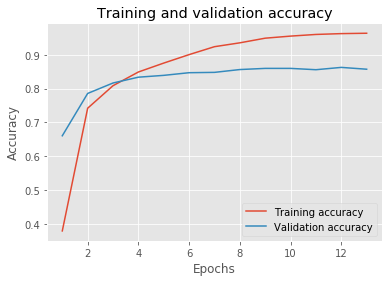

In [30]:
plt.plot(epochs, accuracy, label='Training accuracy')
plt.plot(epochs, val_accuracy, label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend()
plt.show();

In [31]:
rounded_labels=np.argmax(y_val, axis=1)
rounded_labels[1]

1

In [32]:
y_pred = model.predict(x_val, batch_size=64, verbose=1)
y_pred_bool = np.argmax(y_pred, axis=1)

print(classification_report(rounded_labels, y_pred_bool))

2043/2043 [==============================] - 13s 6ms/sample
              precision    recall  f1-score   support

           0       0.97      0.97      0.97       237
           1       0.97      1.00      0.99       190
           2       1.00      1.00      1.00       205
           3       0.98      1.00      0.99       179
           4       0.00      0.00      0.00         7
           5       0.41      0.58      0.48        12
           6       0.00      0.00      0.00         5
           7       0.45      0.50      0.47        36
           8       0.82      0.53      0.64        17
           9       0.57      0.53      0.55        15
          10       0.00      0.00      0.00         2
          11       0.71      0.56      0.63         9
          12       1.00      1.00      1.00         6
          13       0.33      0.30      0.32        10
          14       0.24      0.42      0.31        19
          15       0.75      0.46      0.57        26
          16       0.

#### Results are quite good and most of the class assignment is more than 75%

#### Classification report

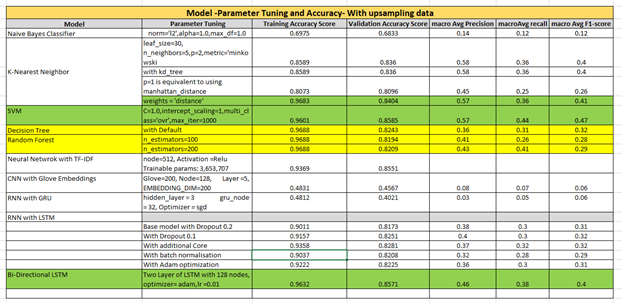

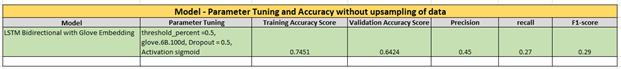

#### Final Remarks on model Selection: We observed that KNN, SVM and BiDirectional LSTM are the outperfromar.Most of the model are able to provide precision on higher side with the majority class, which is quite impressive. If there is more data then this would help to train the model more and precission would increase. For the details please refere our project report.